In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc #didnt need
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime
from cartopy.feature.nightshade import Nightshade
import seaborn as sns

from matplotlib.pyplot import figure
from scipy import stats

In [2]:
bvillem=pd.read_csv(r'paolas_work(thank_you)/paolas_work(thank_you)/Brownsville_monthly.csv')
mcallnm=pd.read_csv(r'paolas_work(thank_you)/paolas_work(thank_you)//McAllen_monthly.csv')
rgcitym=pd.read_csv(r'paolas_work(thank_you)/paolas_work(thank_you)//RioGrandeCity_monthly.csv')

bvilley = pd.read_csv(r'paolas_work(thank_you)/paolas_work(thank_you)//Brownsville_yearly.csv')
rgcityy = pd.read_csv(r'paolas_work(thank_you)/paolas_work(thank_you)//RioGrandeCity_yearly.csv')
mcallny = pd.read_csv(r'paolas_work(thank_you)/paolas_work(thank_you)//McAllen_yearly.csv')


In [3]:
hidalgo_yearly= pd.read_csv(r"hidalgocty_yearly_PG (2).csv" )

In [4]:
Edinburg_17NNE= hidalgo_yearly[hidalgo_yearly['NAME'] == "EDINBURG 17 NNE, TX US"]

In [145]:
mckook= hidalgo_yearly[hidalgo_yearly['NAME'] == "MCCOOK, TX US"]

In [159]:
bville1950 = bvilley[bvilley["DATE"]>=1950]
rgcity1950 = rgcityy[rgcityy["DATE"]>=1950]
mcalln1950 = mcallny[mcallny["DATE"]>=1950]
mckook1950 = mckook[mckook["YEAR"]>=1950]


mcalln1950 = mcalln1950.dropna(subset=["TAVG"])
bville1950 = bville1950.dropna(subset=["TAVG"])
rgcity1950 = rgcity1950.dropna(subset=["TAVG"])


rgcitym["DATE"] = pd.to_datetime(rgcitym["DATE"])
bvillem["DATE"] = pd.to_datetime(bvillem["DATE"])
mcallnm["DATE"] = pd.to_datetime(mcallnm["DATE"])
mckook["DATE"] =  pd.date_range(start = '01/01/1956', end = '12/31/2017', freq='Y') 
#add column for month 
bvillem["MONTH"]= bvillem["DATE"].dt.month
rgcitym["MONTH"]= rgcitym["DATE"].dt.month
mcallnm["MONTH"]= mcallnm["DATE"].dt.month

#add column for year 
bvillem["YEAR"]= bvillem["DATE"].dt.year
rgcitym["YEAR"]= rgcitym["DATE"].dt.year
mcallnm["YEAR"]= mcallnm["DATE"].dt.year

#drop rows with nans in TMAX, EMXT, EMNT
mcallnm = mcallnm.dropna(subset=["TAVG","EMXT","EMNT"])
bvillem = bvillem.dropna(subset=["TAVG","EMXT","EMNT"])
rgcitym = rgcitym.dropna(subset=["TAVG","EMXT","EMNT"])

/glade/u/apps/dav/opt/python/3.7.9/gnu/9.1.0/pkg-library/20201220/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [160]:
mckook

,Unnamed: 0,NUM_MONTH,TAVG,TAVG_STD,TMAX,TMAX_STD,TMIN,TMIN_STD,YEAR,NAME,DATE
143,143,12.0,77.456612,8.556148,90.025166,8.413010,64.888057,8.977698,1950.0,"MCCOOK, TX US",1956-12-31
144,144,12.0,75.120553,9.566864,87.543527,8.623531,62.697578,10.631679,1951.0,"MCCOOK, TX US",1957-12-31
145,145,12.0,74.547942,8.296162,87.119087,8.655704,61.976797,8.416538,1952.0,"MCCOOK, TX US",1958-12-31
146,146,12.0,75.201962,10.641585,87.946311,10.824804,62.457614,10.618925,1953.0,"MCCOOK, TX US",1959-12-31
147,147,11.0,74.968313,8.628386,87.655974,7.968888,62.280653,9.413927,1954.0,"MCCOOK, TX US",1960-12-31
...,...,...,...,...,...,...,...,...,...,...,...
200,200,11.0,76.170230,11.635014,88.661028,12.269715,63.679433,11.125008,2009.0,"MCCOOK, TX US",2013-12-31
201,201,11.0,72.639730,12.351606,84.671691,11.518316,60.607770,13.342072,2010.0,"MCCOOK, TX US",2014-12-31
202,202,11.0,74.980751,11.858791,87.569380,12.362021,62.392122,11.524546,2011.0,"MCCOOK, TX US",2015-12-31
203,203,9.0,72.137509,8.552305,83.404912,9.155075,60.870105,8.130391,2012.0,"MCCOOK, TX US",2016-12-31


In [161]:
GFDL0_585= r'gfdl-esm4_r1i1p1f1_w5e5_ssp585_tas_global_daily_2015_2020.nc'
GFDL0_585= xr.open_dataset(GFDL0_585, decode_times=False)
GFDL1_585= r'gfdl-esm4_r1i1p1f1_w5e5_ssp585_tas_global_daily_2021_2030.nc'
GFDL1_585= xr.open_dataset(GFDL1_585, decode_times=False)
GFDL2_585= r'gfdl-esm4_r1i1p1f1_w5e5_ssp585_tas_global_daily_2031_2040.nc'
GFDL2_585= xr.open_dataset(GFDL2_585, decode_times=False)
GFDL3_585= r'gfdl-esm4_r1i1p1f1_w5e5_ssp585_tas_global_daily_2041_2050.nc'
GFDL3_585= xr.open_dataset(GFDL3_585, decode_times=False)
GFDL4_585= r'gfdl-esm4_r1i1p1f1_w5e5_ssp585_tas_global_daily_2051_2060.nc'
GFDL4_585= xr.open_dataset(GFDL4_585, decode_times=False)
GFDL5_585= r'gfdl-esm4_r1i1p1f1_w5e5_ssp585_tas_global_daily_2061_2070.nc'
GFDL5_585= xr.open_dataset(GFDL5_585, decode_times=False)
GFDL6_585= r'gfdl-esm4_r1i1p1f1_w5e5_ssp585_tas_global_daily_2071_2080.nc'
GFDL6_585= xr.open_dataset(GFDL6_585, decode_times=False)
GFDL7_585= r'gfdl-esm4_r1i1p1f1_w5e5_ssp585_tas_global_daily_2081_2090.nc'
GFDL7_585= xr.open_dataset(GFDL7_585, decode_times=False)
GFDL8_585= r'gfdl-esm4_r1i1p1f1_w5e5_ssp585_tas_global_daily_2091_2100.nc'
GFDL8_585= xr.open_dataset(GFDL8_585, decode_times=False)


IPSL0_585= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp585_tas_global_daily_2015_2020.nc.1'
IPSL0_585= xr.open_dataset(IPSL0_585, decode_times=False)
IPSL1_585= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp585_tas_global_daily_2021_2030.nc.1'
IPSL1_585= xr.open_dataset(IPSL1_585, decode_times=False)
IPSL2_585= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp585_tas_global_daily_2031_2040.nc.1'
IPSL2_585= xr.open_dataset(IPSL2_585, decode_times=False)
IPSL3_585= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp585_tas_global_daily_2041_2050.nc.1'
IPSL3_585= xr.open_dataset(IPSL3_585, decode_times=False)
IPSL4_585= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp585_tas_global_daily_2051_2060.nc.1'
IPSL4_585= xr.open_dataset(IPSL4_585, decode_times=False)
IPSL5_585= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp585_tas_global_daily_2061_2070.nc.1'
IPSL5_585= xr.open_dataset(IPSL5_585, decode_times=False)
IPSL6_585= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp585_tas_global_daily_2071_2080.nc.1'
IPSL6_585= xr.open_dataset(IPSL6_585, decode_times=False)
IPSL7_585= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp585_tas_global_daily_2081_2090.nc.1'
IPSL7_585= xr.open_dataset(IPSL7_585, decode_times=False)
IPSL8_585= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp585_tas_global_daily_2091_2100.nc.1'
IPSL8_585= xr.open_dataset(IPSL8_585, decode_times=False)


MRI0_585= r'mri-esm2-0_r1i1p1f1_w5e5_ssp585_tas_global_daily_2015_2020.nc'
MRI0_585= xr.open_dataset(MRI0_585, decode_times=False)
MRI1_585= r'mri-esm2-0_r1i1p1f1_w5e5_ssp585_tas_global_daily_2021_2030.nc'
MRI1_585= xr.open_dataset(MRI1_585, decode_times=False)
MRI2_585= r'mri-esm2-0_r1i1p1f1_w5e5_ssp585_tas_global_daily_2031_2040.nc'
MRI2_585= xr.open_dataset(MRI2_585, decode_times=False)
MRI3_585= r'mri-esm2-0_r1i1p1f1_w5e5_ssp585_tas_global_daily_2041_2050.nc'
MRI3_585= xr.open_dataset(MRI3_585, decode_times=False)
MRI4_585= r'mri-esm2-0_r1i1p1f1_w5e5_ssp585_tas_global_daily_2051_2060.nc'
MRI4_585= xr.open_dataset(MRI4_585, decode_times=False)
MRI5_585= r'mri-esm2-0_r1i1p1f1_w5e5_ssp585_tas_global_daily_2061_2070.nc'
MRI5_585= xr.open_dataset(MRI5_585, decode_times=False)
MRI6_585= r'mri-esm2-0_r1i1p1f1_w5e5_ssp585_tas_global_daily_2071_2080.nc'
MRI6_585= xr.open_dataset(MRI6_585, decode_times=False)
MRI7_585= r'mri-esm2-0_r1i1p1f1_w5e5_ssp585_tas_global_daily_2081_2090.nc'
MRI7_585= xr.open_dataset(MRI7_585, decode_times=False)
MRI8_585= r'mri-esm2-0_r1i1p1f1_w5e5_ssp585_tas_global_daily_2091_2100.nc'
MRI8_585= xr.open_dataset(MRI8_585, decode_times=False)


UKE0_585= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp585_tas_global_daily_2015_2020.nc'
UKE0_585= xr.open_dataset(UKE0_585, decode_times=False)
UKE1_585= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp585_tas_global_daily_2021_2030.nc'
UKE1_585= xr.open_dataset(UKE1_585, decode_times=False)
UKE2_585= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp585_tas_global_daily_2031_2040.nc'
UKE2_585= xr.open_dataset(UKE2_585, decode_times=False)
UKE3_585= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp585_tas_global_daily_2041_2050.nc'
UKE3_585= xr.open_dataset(UKE3_585, decode_times=False)
UKE4_585= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp585_tas_global_daily_2051_2060.nc'
UKE4_585= xr.open_dataset(UKE4_585, decode_times=False)
UKE5_585= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp585_tas_global_daily_2061_2070.nc'
UKE5_585= xr.open_dataset(UKE5_585, decode_times=False)
UKE6_585= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp585_tas_global_daily_2071_2080.nc'
UKE6_585= xr.open_dataset(UKE6_585, decode_times=False)
UKE7_585= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp585_tas_global_daily_2081_2090.nc'
UKE7_585= xr.open_dataset(UKE7_585, decode_times=False)
UKE8_585= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp585_tas_global_daily_2091_2100.nc'
UKE8_585= xr.open_dataset(UKE8_585, decode_times=False)

In [162]:
GFDL0_370= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2015_2020.nc'
GFDL0_370= xr.open_dataset(GFDL0_370, decode_times=False)
GFDL1_370= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2021_2030.nc'
GFDL1_370= xr.open_dataset(GFDL1_370, decode_times=False)
GFDL2_370= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2031_2040.nc'
GFDL2_370= xr.open_dataset(GFDL2_370, decode_times=False)
GFDL3_370= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2041_2050.nc'
GFDL3_370= xr.open_dataset(GFDL3_370, decode_times=False)
GFDL4_370= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2051_2060.nc'
GFDL4_370= xr.open_dataset(GFDL4_370, decode_times=False)
GFDL5_370= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2061_2070.nc'
GFDL5_370= xr.open_dataset(GFDL5_370, decode_times=False)
GFDL6_370= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2071_2080.nc'
GFDL6_370= xr.open_dataset(GFDL6_370, decode_times=False)
GFDL7_370= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2081_2090.nc'
GFDL7_370= xr.open_dataset(GFDL7_370, decode_times=False)
GFDL8_370= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2091_2100.nc'
GFDL8_370= xr.open_dataset(GFDL8_370, decode_times=False)


IPSL0_370= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2015_2020.nc.1'
IPSL0_370= xr.open_dataset(IPSL0_370, decode_times=False)
IPSL1_370= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2021_2030.nc.1'
IPSL1_370= xr.open_dataset(IPSL1_370, decode_times=False)
IPSL2_370= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2031_2040.nc.1'
IPSL2_370= xr.open_dataset(IPSL2_370, decode_times=False)
IPSL3_370= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2041_2050.nc.1'
IPSL3_370= xr.open_dataset(IPSL3_370, decode_times=False)
IPSL4_370= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2051_2060.nc.1'
IPSL4_370= xr.open_dataset(IPSL4_370, decode_times=False)
IPSL5_370= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2061_2070.nc.1'
IPSL5_370= xr.open_dataset(IPSL5_370, decode_times=False)
IPSL6_370= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2071_2080.nc.1'
IPSL6_370= xr.open_dataset(IPSL6_370, decode_times=False)
IPSL7_370= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2081_2090.nc.1'
IPSL7_370= xr.open_dataset(IPSL7_370, decode_times=False)
IPSL8_370= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2091_2100.nc.1'
IPSL8_370= xr.open_dataset(IPSL8_370, decode_times=False)


MRI0_370= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2015_2020.nc'
MRI0_370= xr.open_dataset(MRI0_370, decode_times=False)
MRI1_370= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2021_2030.nc'
MRI1_370= xr.open_dataset(MRI1_370, decode_times=False)
MRI2_370= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2031_2040.nc'
MRI2_370= xr.open_dataset(MRI2_370, decode_times=False)
MRI3_370= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2041_2050.nc'
MRI3_370= xr.open_dataset(MRI3_370, decode_times=False)
MRI4_370= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2051_2060.nc'
MRI4_370= xr.open_dataset(MRI4_370, decode_times=False)
MRI5_370= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2061_2070.nc'
MRI5_370= xr.open_dataset(MRI5_370, decode_times=False)
MRI6_370= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2071_2080.nc'
MRI6_370= xr.open_dataset(MRI6_370, decode_times=False)
MRI7_370= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2081_2090.nc'
MRI7_370= xr.open_dataset(MRI7_370, decode_times=False)
MRI8_370= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2091_2100.nc'
MRI8_370= xr.open_dataset(MRI8_370, decode_times=False)


UKE0_370= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2015_2020.nc'
UKE0_370= xr.open_dataset(UKE0_370, decode_times=False)
UKE1_370= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2021_2030.nc'
UKE1_370= xr.open_dataset(UKE1_370, decode_times=False)
UKE2_370= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2031_2040.nc'
UKE2_370= xr.open_dataset(UKE2_370, decode_times=False)
UKE3_370= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2041_2050.nc'
UKE3_370= xr.open_dataset(UKE3_370, decode_times=False)
UKE4_370= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2051_2060.nc'
UKE4_370= xr.open_dataset(UKE4_370, decode_times=False)
UKE5_370= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2061_2070.nc'
UKE5_370= xr.open_dataset(UKE5_370, decode_times=False)
UKE6_370= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2071_2080.nc'
UKE6_370= xr.open_dataset(UKE6_370, decode_times=False)
UKE7_370= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2081_2090.nc'
UKE7_370= xr.open_dataset(UKE7_370, decode_times=False)
UKE8_370= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2091_2100.nc'
UKE8_370= xr.open_dataset(UKE8_370, decode_times=False)

In [163]:
GFDL0_126= r'gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily_2015_2020.nc'
GFDL0_126= xr.open_dataset(GFDL0_126, decode_times=False)
GFDL1_126= r'gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily_2021_2030.nc'
GFDL1_126= xr.open_dataset(GFDL1_126, decode_times=False)
GFDL2_126= r'gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily_2031_2040.nc'
GFDL2_126= xr.open_dataset(GFDL2_126, decode_times=False)
GFDL3_126= r'gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily_2041_2050.nc'
GFDL3_126= xr.open_dataset(GFDL3_126, decode_times=False)
GFDL4_126= r'gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily_2051_2060.nc'
GFDL4_126= xr.open_dataset(GFDL4_126, decode_times=False)
GFDL5_126= r'gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily_2061_2070.nc'
GFDL5_126= xr.open_dataset(GFDL5_126, decode_times=False)
GFDL6_126= r'gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily_2071_2080.nc'
GFDL6_126= xr.open_dataset(GFDL6_126, decode_times=False)
GFDL7_126= r'gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily_2081_2090.nc'
GFDL7_126= xr.open_dataset(GFDL7_126, decode_times=False)
GFDL8_126= r'gfdl-esm4_r1i1p1f1_w5e5_ssp126_tas_global_daily_2091_2100.nc'
GFDL8_126= xr.open_dataset(GFDL8_126, decode_times=False)


IPSL0_126= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2015_2020.nc.1'
IPSL0_126= xr.open_dataset(IPSL0_126, decode_times=False)
IPSL1_126= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2021_2030.nc.1'
IPSL1_126= xr.open_dataset(IPSL1_126, decode_times=False)
IPSL2_126= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2031_2040.nc.1'
IPSL2_126= xr.open_dataset(IPSL2_126, decode_times=False)
IPSL3_126= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2041_2050.nc.1'
IPSL3_126= xr.open_dataset(IPSL3_126, decode_times=False)
IPSL4_126= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2051_2060.nc.1'
IPSL4_126= xr.open_dataset(IPSL4_126, decode_times=False)
IPSL5_126= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2061_2070.nc.1'
IPSL5_126= xr.open_dataset(IPSL5_126, decode_times=False)
IPSL6_126= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2071_2080.nc.1'
IPSL6_126= xr.open_dataset(IPSL6_126, decode_times=False)
IPSL7_126= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2081_2090.nc.1'
IPSL7_126= xr.open_dataset(IPSL7_126, decode_times=False)
IPSL8_126= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2091_2100.nc.1'
IPSL8_126= xr.open_dataset(IPSL8_126, decode_times=False)


MRI0_126= r'mri-esm2-0_r1i1p1f1_w5e5_ssp126_tas_global_daily_2015_2020.nc'
MRI0_126= xr.open_dataset(MRI0_126, decode_times=False)
MRI1_126= r'mri-esm2-0_r1i1p1f1_w5e5_ssp126_tas_global_daily_2021_2030.nc'
MRI1_126= xr.open_dataset(MRI1_126, decode_times=False)
MRI2_126= r'mri-esm2-0_r1i1p1f1_w5e5_ssp126_tas_global_daily_2031_2040.nc'
MRI2_126= xr.open_dataset(MRI2_126, decode_times=False)
MRI3_126= r'mri-esm2-0_r1i1p1f1_w5e5_ssp126_tas_global_daily_2041_2050.nc'
MRI3_126= xr.open_dataset(MRI3_126, decode_times=False)
MRI4_126= r'mri-esm2-0_r1i1p1f1_w5e5_ssp126_tas_global_daily_2051_2060.nc'
MRI4_126= xr.open_dataset(MRI4_126, decode_times=False)
MRI5_126= r'mri-esm2-0_r1i1p1f1_w5e5_ssp126_tas_global_daily_2061_2070.nc'
MRI5_126= xr.open_dataset(MRI5_126, decode_times=False)
MRI6_126= r'mri-esm2-0_r1i1p1f1_w5e5_ssp126_tas_global_daily_2071_2080.nc'
MRI6_126= xr.open_dataset(MRI6_126, decode_times=False)
MRI7_126= r'mri-esm2-0_r1i1p1f1_w5e5_ssp126_tas_global_daily_2081_2090.nc'
MRI7_126= xr.open_dataset(MRI7_126, decode_times=False)
MRI8_126= r'mri-esm2-0_r1i1p1f1_w5e5_ssp126_tas_global_daily_2091_2100.nc'
MRI8_126= xr.open_dataset(MRI8_126, decode_times=False)


UKE0_126= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp126_tas_global_daily_2015_2020.nc'
UKE0_126= xr.open_dataset(UKE0_126, decode_times=False)
UKE1_126= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp126_tas_global_daily_2021_2030.nc'
UKE1_126= xr.open_dataset(UKE1_126, decode_times=False)
UKE2_126= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp126_tas_global_daily_2031_2040.nc'
UKE2_126= xr.open_dataset(UKE2_126, decode_times=False)
UKE3_126= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp126_tas_global_daily_2041_2050.nc'
UKE3_126= xr.open_dataset(UKE3_126, decode_times=False)
UKE4_126= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp126_tas_global_daily_2051_2060.nc'
UKE4_126= xr.open_dataset(UKE4_126, decode_times=False)
UKE5_126= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp126_tas_global_daily_2061_2070.nc'
UKE5_126= xr.open_dataset(UKE5_126, decode_times=False)
UKE6_126= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp126_tas_global_daily_2071_2080.nc'
UKE6_126= xr.open_dataset(UKE6_126, decode_times=False)
UKE7_126= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp126_tas_global_daily_2081_2090.nc'
UKE7_126= xr.open_dataset(UKE7_126, decode_times=False)
UKE8_126= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp126_tas_global_daily_2091_2100.nc.1'
UKE8_126= xr.open_dataset(UKE8_126, decode_times=False)

In [164]:
GFDL0_pi= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2015_2020.nc'
GFDL0_pi= xr.open_dataset(GFDL0_pi, decode_times=False)
GFDL1_pi= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2021_2030.nc'
GFDL1_pi= xr.open_dataset(GFDL1_pi, decode_times=False)
GFDL2_pi= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2031_2040.nc'
GFDL2_pi= xr.open_dataset(GFDL2_pi, decode_times=False)
GFDL3_pi= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2041_2050.nc'
GFDL3_pi= xr.open_dataset(GFDL3_pi, decode_times=False)
GFDL4_pi= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2051_2060.nc'
GFDL4_pi= xr.open_dataset(GFDL4_pi, decode_times=False)
GFDL5_pi= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2061_2070.nc'
GFDL5_pi= xr.open_dataset(GFDL5_pi, decode_times=False)
GFDL6_pi= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2071_2080.nc'
GFDL6_pi= xr.open_dataset(GFDL6_pi, decode_times=False)
GFDL7_pi= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2081_2090.nc'
GFDL7_pi= xr.open_dataset(GFDL7_pi, decode_times=False)
GFDL8_pi= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tas_global_daily_2091_2100.nc'
GFDL8_pi= xr.open_dataset(GFDL8_pi, decode_times=False)


IPSL0_pi= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2015_2020.nc.1'
IPSL0_pi= xr.open_dataset(IPSL0_pi, decode_times=False)
IPSL1_pi= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2021_2030.nc.1'
IPSL1_pi= xr.open_dataset(IPSL1_pi, decode_times=False)
IPSL2_pi= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2031_2040.nc.1'
IPSL2_pi= xr.open_dataset(IPSL2_pi, decode_times=False)
IPSL3_pi= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2041_2050.nc.1'
IPSL3_pi= xr.open_dataset(IPSL3_pi, decode_times=False)
IPSL4_pi= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2051_2060.nc.1'
IPSL4_pi= xr.open_dataset(IPSL4_pi, decode_times=False)
IPSL5_pi= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2061_2070.nc.1'
IPSL5_pi= xr.open_dataset(IPSL5_pi, decode_times=False)
IPSL6_pi= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2071_2080.nc.1'
IPSL6_pi= xr.open_dataset(IPSL6_pi, decode_times=False)
IPSL7_pi= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2081_2090.nc.1'
IPSL7_pi= xr.open_dataset(IPSL7_pi, decode_times=False)
IPSL8_pi= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_ssp370_tas_global_daily_2091_2100.nc.1'
IPSL8_pi= xr.open_dataset(IPSL8_pi, decode_times=False)


MRI0_pi= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2015_2020.nc'
MRI0_pi= xr.open_dataset(MRI0_pi, decode_times=False)
MRI1_pi= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2021_2030.nc'
MRI1_pi= xr.open_dataset(MRI1_pi, decode_times=False)
MRI2_pi= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2031_2040.nc'
MRI2_pi= xr.open_dataset(MRI2_pi, decode_times=False)
MRI3_pi= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2041_2050.nc'
MRI3_pi= xr.open_dataset(MRI3_pi, decode_times=False)
MRI4_pi= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2051_2060.nc'
MRI4_pi= xr.open_dataset(MRI4_pi, decode_times=False)
MRI5_pi= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2061_2070.nc'
MRI5_pi= xr.open_dataset(MRI5_pi, decode_times=False)
MRI6_pi= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2071_2080.nc'
MRI6_pi= xr.open_dataset(MRI6_pi, decode_times=False)
MRI7_pi= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2081_2090.nc'
MRI7_pi= xr.open_dataset(MRI7_pi, decode_times=False)
MRI8_pi= r'mri-esm2-0_r1i1p1f1_w5e5_ssp370_tas_global_daily_2091_2100.nc'
MRI8_pi= xr.open_dataset(MRI8_pi, decode_times=False)


UKE0_pi= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2015_2020.nc'
UKE0_pi= xr.open_dataset(UKE0_pi, decode_times=False)
UKE1_pi= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2021_2030.nc'
UKE1_pi= xr.open_dataset(UKE1_pi, decode_times=False)
UKE2_pi= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2031_2040.nc'
UKE2_pi= xr.open_dataset(UKE2_pi, decode_times=False)
UKE3_pi= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2041_2050.nc'
UKE3_pi= xr.open_dataset(UKE3_pi, decode_times=False)
UKE4_pi= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2051_2060.nc'
UKE4_pi= xr.open_dataset(UKE4_pi, decode_times=False)
UKE5_pi= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2061_2070.nc'
UKE5_pi= xr.open_dataset(UKE5_pi, decode_times=False)
UKE6_pi= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2071_2080.nc'
UKE6_pi= xr.open_dataset(UKE6_pi, decode_times=False)
UKE7_pi= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2081_2090.nc'
UKE7_pi= xr.open_dataset(UKE7_pi, decode_times=False)
UKE8_pi= r'ukesm1-0-ll_r1i1p1f2_w5e5_ssp370_tas_global_daily_2091_2100.nc'
UKE8_pi= xr.open_dataset(UKE8_pi, decode_times=False)

In [165]:
GFDL0_hist= r'gfdl-esm4_r1i1p1f1_w5e5_historical_tas_global_daily_1850_1850.nc'
GFDL0_hist= xr.open_dataset(GFDL0_hist, decode_times=False)
GFDL1_hist= r'gfdl-esm4_r1i1p1f1_w5e5_historical_tas_global_daily_1851_1860.nc'
GFDL1_hist= xr.open_dataset(GFDL1_hist, decode_times=False)
GFDL2_hist= r'gfdl-esm4_r1i1p1f1_w5e5_historical_tas_global_daily_1861_1870.nc'
GFDL2_hist= xr.open_dataset(GFDL2_hist, decode_times=False)
GFDL3_hist= r'gfdl-esm4_r1i1p1f1_w5e5_historical_tas_global_daily_1871_1880.nc'
GFDL3_hist= xr.open_dataset(GFDL3_hist, decode_times=False)
GFDL4_hist= r'gfdl-esm4_r1i1p1f1_w5e5_historical_tas_global_daily_1881_1890.nc'
GFDL4_hist= xr.open_dataset(GFDL4_hist, decode_times=False)
GFDL5_hist= r'gfdl-esm4_r1i1p1f1_w5e5_historical_tas_global_daily_1891_1900.nc'
GFDL5_hist= xr.open_dataset(GFDL5_hist, decode_times=False)
GFDL6_hist= r'gfdl-esm4_r1i1p1f1_w5e5_historical_tas_global_daily_1991_2000.nc'
GFDL6_hist= xr.open_dataset(GFDL6_hist, decode_times=False)
GFDL7_hist= r'gfdl-esm4_r1i1p1f1_w5e5_historical_tas_global_daily_2001_2010.nc'
GFDL7_hist= xr.open_dataset(GFDL7_hist, decode_times=False)
GFDL8_hist= r'gfdl-esm4_r1i1p1f1_w5e5_historical_tas_global_daily_2011_2014.nc'
GFDL8_hist= xr.open_dataset(GFDL8_hist, decode_times=False)

IPSL0_hist= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_historical_tas_global_daily_1850_1850.nc'
IPSL0_hist= xr.open_dataset(IPSL0_hist, decode_times=False)
IPSL1_hist= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_historical_tas_global_daily_1851_1860.nc'
IPSL1_hist= xr.open_dataset(IPSL1_hist, decode_times=False)
IPSL2_hist= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_historical_tas_global_daily_1861_1870.nc'
IPSL2_hist= xr.open_dataset(IPSL2_hist, decode_times=False)
IPSL3_hist= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_historical_tas_global_daily_1871_1880.nc'
IPSL3_hist= xr.open_dataset(IPSL3_hist, decode_times=False)
IPSL4_hist= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_historical_tas_global_daily_1881_1890.nc'
IPSL4_hist= xr.open_dataset(IPSL4_hist, decode_times=False)
IPSL5_hist= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_historical_tas_global_daily_1891_1900.nc'
IPSL5_hist= xr.open_dataset(IPSL5_hist, decode_times=False)
IPSL6_hist= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_historical_tas_global_daily_1991_2000.nc'
IPSL6_hist= xr.open_dataset(IPSL6_hist, decode_times=False)
IPSL7_hist= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_historical_tas_global_daily_2001_2010.nc'
IPSL7_hist= xr.open_dataset(IPSL7_hist, decode_times=False)
IPSL8_hist= r'ipsl-cm6a-lr_r1i1p1f1_w5e5_historical_tas_global_daily_2011_2014.nc'
IPSL8_hist= xr.open_dataset(IPSL8_hist, decode_times=False)

MRI0_hist= r'mri-esm2-0_r1i1p1f1_w5e5_historical_tas_global_daily_1850_1850.nc'
MRI0_hist= xr.open_dataset(MRI0_hist, decode_times=False)
MRI1_hist= r'mri-esm2-0_r1i1p1f1_w5e5_historical_tas_global_daily_1851_1860.nc'
MRI1_hist= xr.open_dataset(MRI1_hist, decode_times=False)
MRI2_hist= r'mri-esm2-0_r1i1p1f1_w5e5_historical_tas_global_daily_1861_1870.nc'
MRI2_hist= xr.open_dataset(MRI2_hist, decode_times=False)
MRI3_hist= r'mri-esm2-0_r1i1p1f1_w5e5_historical_tas_global_daily_1871_1880.nc'
MRI3_hist= xr.open_dataset(MRI3_hist, decode_times=False)
MRI4_hist= r'mri-esm2-0_r1i1p1f1_w5e5_historical_tas_global_daily_1881_1890.nc'
MRI4_hist= xr.open_dataset(MRI4_hist, decode_times=False)
MRI5_hist= r'mri-esm2-0_r1i1p1f1_w5e5_historical_tas_global_daily_1891_1900.nc'
MRI5_hist= xr.open_dataset(MRI5_hist, decode_times=False)
MRI6_hist= r'mri-esm2-0_r1i1p1f1_w5e5_historical_tas_global_daily_1991_2000.nc'
MRI6_hist= xr.open_dataset(MRI6_hist, decode_times=False)
MRI7_hist= r'mri-esm2-0_r1i1p1f1_w5e5_historical_tas_global_daily_2001_2010.nc'
MRI7_hist= xr.open_dataset(MRI7_hist, decode_times=False)
MRI8_hist= r'mri-esm2-0_r1i1p1f1_w5e5_historical_tas_global_daily_2011_2014.nc'
MRI8_hist= xr.open_dataset(MRI8_hist, decode_times=False)

UKE0_hist= r'ukesm1-0-ll_r1i1p1f2_w5e5_historical_tas_global_daily_1850_1850.nc'
UKE0_hist= xr.open_dataset(UKE0_hist, decode_times=False)
UKE1_hist= r'ukesm1-0-ll_r1i1p1f2_w5e5_historical_tas_global_daily_1851_1860.nc'
UKE1_hist= xr.open_dataset(UKE1_hist, decode_times=False)
UKE2_hist= r'ukesm1-0-ll_r1i1p1f2_w5e5_historical_tas_global_daily_1861_1870.nc'
UKE2_hist= xr.open_dataset(UKE2_hist, decode_times=False)
UKE3_hist= r'ukesm1-0-ll_r1i1p1f2_w5e5_historical_tas_global_daily_1871_1880.nc'
UKE3_hist= xr.open_dataset(UKE3_hist, decode_times=False)
UKE4_hist= r'ukesm1-0-ll_r1i1p1f2_w5e5_historical_tas_global_daily_1881_1890.nc'
UKE4_hist= xr.open_dataset(UKE4_hist, decode_times=False)
UKE5_hist= r'ukesm1-0-ll_r1i1p1f2_w5e5_historical_tas_global_daily_1891_1900.nc'
UKE5_hist= xr.open_dataset(UKE5_hist, decode_times=False)
UKE6_hist= r'ukesm1-0-ll_r1i1p1f2_w5e5_historical_tas_global_daily_1991_2000.nc'
UKE6_hist= xr.open_dataset(UKE6_hist, decode_times=False)
UKE7_hist= r'ukesm1-0-ll_r1i1p1f2_w5e5_historical_tas_global_daily_2001_2010.nc'
UKE7_hist= xr.open_dataset(UKE7_hist, decode_times=False)
UKE8_hist= r'ukesm1-0-ll_r1i1p1f2_w5e5_historical_tas_global_daily_2011_2014.nc'
UKE8_hist= xr.open_dataset(UKE8_hist, decode_times=False)

In [13]:
#BROWNSVILLE
#data1.lat[128]
#data1.lon[164]

#MCALLEN
#data1.lat[127]
#data1.lon[163]

#RGC
#data1.lat[127]
#data1.lon[162]

In [14]:
 HDF5_USE_FILE_LOCKING = False

In [15]:
GTMC0_hist= GFDL0_hist.tas[:,127,163]
GTMC1_hist= GFDL1_hist.tas[:,127,163]
GTMC2_hist= GFDL2_hist.tas[:,127,163]
GTMC3_hist= GFDL3_hist.tas[:,127,163]
GTMC4_hist= GFDL4_hist.tas[:,127,163]
GTMC5_hist= GFDL5_hist.tas[:,127,163]
GTMC6_hist= GFDL6_hist.tas[:,127,163]
GTMC7_hist= GFDL7_hist.tas[:,127,163]
GTMC8_hist= GFDL8_hist.tas[:,127,163]

GFTMC0_hist= GTMC0_hist.to_dataframe()
GFTMC1_hist= GTMC1_hist.to_dataframe()
GFTMC2_hist= GTMC2_hist.to_dataframe()
GFTMC3_hist= GTMC3_hist.to_dataframe()
GFTMC4_hist= GTMC4_hist.to_dataframe()
GFTMC5_hist= GTMC5_hist.to_dataframe()
GFTMC6_hist= GTMC6_hist.to_dataframe()
GFTMC7_hist= GTMC7_hist.to_dataframe()
GFTMC8_hist= GTMC8_hist.to_dataframe()

ITMC0_hist= IPSL0_hist.tas[:,127,163]
ITMC1_hist= IPSL1_hist.tas[:,127,163]
ITMC2_hist= IPSL2_hist.tas[:,127,163]
ITMC3_hist= IPSL3_hist.tas[:,127,163]
ITMC4_hist= IPSL4_hist.tas[:,127,163]
ITMC5_hist= IPSL5_hist.tas[:,127,163]
ITMC6_hist= IPSL6_hist.tas[:,127,163]
ITMC7_hist= IPSL7_hist.tas[:,127,163]
ITMC8_hist= IPSL8_hist.tas[:,127,163]

IFTMC0_hist= ITMC0_hist.to_dataframe()
IFTMC1_hist= ITMC1_hist.to_dataframe()
IFTMC2_hist= ITMC2_hist.to_dataframe()
IFTMC3_hist= ITMC3_hist.to_dataframe()
IFTMC4_hist= ITMC4_hist.to_dataframe()
IFTMC5_hist= ITMC5_hist.to_dataframe()
IFTMC6_hist= ITMC6_hist.to_dataframe()
IFTMC7_hist= ITMC7_hist.to_dataframe()
IFTMC8_hist= ITMC8_hist.to_dataframe()

MTMC0_hist= MRI0_hist.tas[:,127,163]
MTMC1_hist= MRI1_hist.tas[:,127,163]
MTMC2_hist= MRI2_hist.tas[:,127,163]
MTMC3_hist= MRI3_hist.tas[:,127,163]
MTMC4_hist= MRI4_hist.tas[:,127,163]
MTMC5_hist= MRI5_hist.tas[:,127,163]
MTMC6_hist= MRI6_hist.tas[:,127,163]
MTMC7_hist= MRI7_hist.tas[:,127,163]
MTMC8_hist= MRI8_hist.tas[:,127,163]

MFTMC0_hist= MTMC0_hist.to_dataframe()
MFTMC1_hist= MTMC1_hist.to_dataframe()
MFTMC2_hist= MTMC2_hist.to_dataframe()
MFTMC3_hist= MTMC3_hist.to_dataframe()
MFTMC4_hist= MTMC4_hist.to_dataframe()
MFTMC5_hist= MTMC5_hist.to_dataframe()
MFTMC6_hist= MTMC6_hist.to_dataframe()
MFTMC7_hist= MTMC7_hist.to_dataframe()
MFTMC8_hist= MTMC8_hist.to_dataframe()

UTMC0_hist= UKE0_hist.tas[:,127,163]
UTMC1_hist= UKE1_hist.tas[:,127,163]
UTMC2_hist= UKE2_hist.tas[:,127,163]
UTMC3_hist= UKE3_hist.tas[:,127,163]
UTMC4_hist= UKE4_hist.tas[:,127,163]
UTMC5_hist= UKE5_hist.tas[:,127,163]
UTMC6_hist= UKE6_hist.tas[:,127,163]
UTMC7_hist= UKE7_hist.tas[:,127,163]
UTMC8_hist= UKE8_hist.tas[:,127,163]

UFTMC0_hist= UTMC0_hist.to_dataframe()
UFTMC1_hist= UTMC1_hist.to_dataframe()
UFTMC2_hist= UTMC2_hist.to_dataframe()
UFTMC3_hist= UTMC3_hist.to_dataframe()
UFTMC4_hist= UTMC4_hist.to_dataframe()
UFTMC5_hist= UTMC5_hist.to_dataframe()
UFTMC6_hist= UTMC6_hist.to_dataframe()
UFTMC7_hist= UTMC7_hist.to_dataframe()
UFTMC8_hist= UTMC8_hist.to_dataframe()


In [13]:
GTMC0_pi= GFDL0_pi.tas[:,127,163]
GTMC1_pi= GFDL1_pi.tas[:,127,163]
GTMC2_pi= GFDL2_pi.tas[:,127,163]
GTMC3_pi= GFDL3_pi.tas[:,127,163]
GTMC4_pi= GFDL4_pi.tas[:,127,163]
GTMC5_pi= GFDL5_pi.tas[:,127,163]
GTMC6_pi= GFDL6_pi.tas[:,127,163]
GTMC7_pi= GFDL7_pi.tas[:,127,163]
GTMC8_pi= GFDL8_pi.tas[:,127,163]

GFTMC0_pi= GTMC0_pi.to_dataframe()
GFTMC1_pi= GTMC1_pi.to_dataframe()
GFTMC2_pi= GTMC2_pi.to_dataframe()
GFTMC3_pi= GTMC3_pi.to_dataframe()
GFTMC4_pi= GTMC4_pi.to_dataframe()
GFTMC5_pi= GTMC5_pi.to_dataframe()
GFTMC6_pi= GTMC6_pi.to_dataframe()
GFTMC7_pi= GTMC7_pi.to_dataframe()
GFTMC8_pi= GTMC8_pi.to_dataframe()

ITMC0_pi= IPSL0_pi.tas[:,127,163]
ITMC1_pi= IPSL1_pi.tas[:,127,163]
ITMC2_pi= IPSL2_pi.tas[:,127,163]
ITMC3_pi= IPSL3_pi.tas[:,127,163]
ITMC4_pi= IPSL4_pi.tas[:,127,163]
ITMC5_pi= IPSL5_pi.tas[:,127,163]
ITMC6_pi= IPSL6_pi.tas[:,127,163]
ITMC7_pi= IPSL7_pi.tas[:,127,163]
ITMC8_pi= IPSL8_pi.tas[:,127,163]

IFTMC0_pi= ITMC0_pi.to_dataframe()
IFTMC1_pi= ITMC1_pi.to_dataframe()
IFTMC2_pi= ITMC2_pi.to_dataframe()
IFTMC3_pi= ITMC3_pi.to_dataframe()
IFTMC4_pi= ITMC4_pi.to_dataframe()
IFTMC5_pi= ITMC5_pi.to_dataframe()
IFTMC6_pi= ITMC6_pi.to_dataframe()
IFTMC7_pi= ITMC7_pi.to_dataframe()
IFTMC8_pi= ITMC8_pi.to_dataframe()

MTMC0_pi= MRI0_pi.tas[:,127,163]
MTMC1_pi= MRI1_pi.tas[:,127,163]
MTMC2_pi= MRI2_pi.tas[:,127,163]
MTMC3_pi= MRI3_pi.tas[:,127,163]
MTMC4_pi= MRI4_pi.tas[:,127,163]
MTMC5_pi= MRI5_pi.tas[:,127,163]
MTMC6_pi= MRI6_pi.tas[:,127,163]
MTMC7_pi= MRI7_pi.tas[:,127,163]
MTMC8_pi= MRI8_pi.tas[:,127,163]

MFTMC0_pi= MTMC0_pi.to_dataframe()
MFTMC1_pi= MTMC1_pi.to_dataframe()
MFTMC2_pi= MTMC2_pi.to_dataframe()
MFTMC3_pi= MTMC3_pi.to_dataframe()
MFTMC4_pi= MTMC4_pi.to_dataframe()
MFTMC5_pi= MTMC5_pi.to_dataframe()
MFTMC6_pi= MTMC6_pi.to_dataframe()
MFTMC7_pi= MTMC7_pi.to_dataframe()
MFTMC8_pi= MTMC8_pi.to_dataframe()

UTMC0_pi= UKE0_pi.tas[:,127,163]
UTMC1_pi= UKE1_pi.tas[:,127,163]
UTMC2_pi= UKE2_pi.tas[:,127,163]
UTMC3_pi= UKE3_pi.tas[:,127,163]
UTMC4_pi= UKE4_pi.tas[:,127,163]
UTMC5_pi= UKE5_pi.tas[:,127,163]
UTMC6_pi= UKE6_pi.tas[:,127,163]
UTMC7_pi= UKE7_pi.tas[:,127,163]
UTMC8_pi= UKE8_pi.tas[:,127,163]

UFTMC0_pi= UTMC0_pi.to_dataframe()
UFTMC1_pi= UTMC1_pi.to_dataframe()
UFTMC2_pi= UTMC2_pi.to_dataframe()
UFTMC3_pi= UTMC3_pi.to_dataframe()
UFTMC4_pi= UTMC4_pi.to_dataframe()
UFTMC5_pi= UTMC5_pi.to_dataframe()
UFTMC6_pi= UTMC6_pi.to_dataframe()
UFTMC7_pi= UTMC7_pi.to_dataframe()
UFTMC8_pi= UTMC8_pi.to_dataframe()

In [143]:
GTMC0_126= GFDL0_126.tas[:,127,163]
GTMC1_126= GFDL1_126.tas[:,127,163]
GTMC2_126= GFDL2_126.tas[:,127,163]
GTMC3_126= GFDL3_126.tas[:,127,163]
GTMC4_126= GFDL4_126.tas[:,127,163]
GTMC5_126= GFDL5_126.tas[:,127,163]
GTMC6_126= GFDL6_126.tas[:,127,163]
GTMC7_126= GFDL7_126.tas[:,127,163]
GTMC8_126= GFDL8_126.tas[:,127,163]

GFTMC0_126= GTMC0_126.to_dataframe()
GFTMC1_126= GTMC1_126.to_dataframe()
GFTMC2_126= GTMC2_126.to_dataframe()
GFTMC3_126= GTMC3_126.to_dataframe()
GFTMC4_126= GTMC4_126.to_dataframe()
GFTMC5_126= GTMC5_126.to_dataframe()
GFTMC6_126= GTMC6_126.to_dataframe()
GFTMC7_126= GTMC7_126.to_dataframe()
GFTMC8_126= GTMC8_126.to_dataframe()

ITMC0_126= IPSL0_126.tas[:,127,163]
ITMC1_126= IPSL1_126.tas[:,127,163]
ITMC2_126= IPSL2_126.tas[:,127,163]
ITMC3_126= IPSL3_126.tas[:,127,163]
ITMC4_126= IPSL4_126.tas[:,127,163]
ITMC5_126= IPSL5_126.tas[:,127,163]
ITMC6_126= IPSL6_126.tas[:,127,163]
ITMC7_126= IPSL7_126.tas[:,127,163]
ITMC8_126= IPSL8_126.tas[:,127,163]

IFTMC0_126= ITMC0_126.to_dataframe()
IFTMC1_126= ITMC1_126.to_dataframe()
IFTMC2_126= ITMC2_126.to_dataframe()
IFTMC3_126= ITMC3_126.to_dataframe()
IFTMC4_126= ITMC4_126.to_dataframe()
IFTMC5_126= ITMC5_126.to_dataframe()
IFTMC6_126= ITMC6_126.to_dataframe()
IFTMC7_126= ITMC7_126.to_dataframe()
IFTMC8_126= ITMC8_126.to_dataframe()

MTMC0_126= MRI0_126.tas[:,127,163]
MTMC1_126= MRI1_126.tas[:,127,163]
MTMC2_126= MRI2_126.tas[:,127,163]
MTMC3_126= MRI3_126.tas[:,127,163]
MTMC4_126= MRI4_126.tas[:,127,163]
MTMC5_126= MRI5_126.tas[:,127,163]
MTMC6_126= MRI6_126.tas[:,127,163]
MTMC7_126= MRI7_126.tas[:,127,163]
MTMC8_126= MRI8_126.tas[:,127,163]

MFTMC0_126= MTMC0_126.to_dataframe()
MFTMC1_126= MTMC1_126.to_dataframe()
MFTMC2_126= MTMC2_126.to_dataframe()
MFTMC3_126= MTMC3_126.to_dataframe()
MFTMC4_126= MTMC4_126.to_dataframe()
MFTMC5_126= MTMC5_126.to_dataframe()
MFTMC6_126= MTMC6_126.to_dataframe()
MFTMC7_126= MTMC7_126.to_dataframe()
MFTMC8_126= MTMC8_126.to_dataframe()

UTMC0_126= UKE0_126.tas[:,127,163]
UTMC1_126= UKE1_126.tas[:,127,163]
UTMC2_126= UKE2_126.tas[:,127,163]
UTMC3_126= UKE3_126.tas[:,127,163]
UTMC4_126= UKE4_126.tas[:,127,163]
UTMC5_126= UKE5_126.tas[:,127,163]
UTMC6_126= UKE6_126.tas[:,127,163]
UTMC7_126= UKE7_126.tas[:,127,163]
UTMC8_126= UKE8_126.tas[:,127,163]

UFTMC0_126= UTMC0_126.to_dataframe()
UFTMC1_126= UTMC1_126.to_dataframe()
UFTMC2_126= UTMC2_126.to_dataframe()
UFTMC3_126= UTMC3_126.to_dataframe()
UFTMC4_126= UTMC4_126.to_dataframe()
UFTMC5_126= UTMC5_126.to_dataframe()
UFTMC6_126= UTMC6_126.to_dataframe()
UFTMC7_126= UTMC7_126.to_dataframe()
UFTMC8_126= UTMC8_126.to_dataframe()


In [17]:
GTMC0_370= GFDL0_370.tas[:,127,163]
GTMC1_370= GFDL1_370.tas[:,127,163]
GTMC2_370= GFDL2_370.tas[:,127,163]
GTMC3_370= GFDL3_370.tas[:,127,163]
GTMC4_370= GFDL4_370.tas[:,127,163]
GTMC5_370= GFDL5_370.tas[:,127,163]
GTMC6_370= GFDL6_370.tas[:,127,163]
GTMC7_370= GFDL7_370.tas[:,127,163]
GTMC8_370= GFDL8_370.tas[:,127,163]

GFTMC0_370= GTMC0_370.to_dataframe()
GFTMC1_370= GTMC1_370.to_dataframe()
GFTMC2_370= GTMC2_370.to_dataframe()
GFTMC3_370= GTMC3_370.to_dataframe()
GFTMC4_370= GTMC4_370.to_dataframe()
GFTMC5_370= GTMC5_370.to_dataframe()
GFTMC6_370= GTMC6_370.to_dataframe()
GFTMC7_370= GTMC7_370.to_dataframe()
GFTMC8_370= GTMC8_370.to_dataframe()

ITMC0_370= IPSL0_370.tas[:,127,163]
ITMC1_370= IPSL1_370.tas[:,127,163]
ITMC2_370= IPSL2_370.tas[:,127,163]
ITMC3_370= IPSL3_370.tas[:,127,163]
ITMC4_370= IPSL4_370.tas[:,127,163]
ITMC5_370= IPSL5_370.tas[:,127,163]
ITMC6_370= IPSL6_370.tas[:,127,163]
ITMC7_370= IPSL7_370.tas[:,127,163]
ITMC8_370= IPSL8_370.tas[:,127,163]

IFTMC0_370= ITMC0_370.to_dataframe()
IFTMC1_370= ITMC1_370.to_dataframe()
IFTMC2_370= ITMC2_370.to_dataframe()
IFTMC3_370= ITMC3_370.to_dataframe()
IFTMC4_370= ITMC4_370.to_dataframe()
IFTMC5_370= ITMC5_370.to_dataframe()
IFTMC6_370= ITMC6_370.to_dataframe()
IFTMC7_370= ITMC7_370.to_dataframe()
IFTMC8_370= ITMC8_370.to_dataframe()

MTMC0_370= MRI0_370.tas[:,127,163]
MTMC1_370= MRI1_370.tas[:,127,163]
MTMC2_370= MRI2_370.tas[:,127,163]
MTMC3_370= MRI3_370.tas[:,127,163]
MTMC4_370= MRI4_370.tas[:,127,163]
MTMC5_370= MRI5_370.tas[:,127,163]
MTMC6_370= MRI6_370.tas[:,127,163]
MTMC7_370= MRI7_370.tas[:,127,163]
MTMC8_370= MRI8_370.tas[:,127,163]

MFTMC0_370= MTMC0_370.to_dataframe()
MFTMC1_370= MTMC1_370.to_dataframe()
MFTMC2_370= MTMC2_370.to_dataframe()
MFTMC3_370= MTMC3_370.to_dataframe()
MFTMC4_370= MTMC4_370.to_dataframe()
MFTMC5_370= MTMC5_370.to_dataframe()
MFTMC6_370= MTMC6_370.to_dataframe()
MFTMC7_370= MTMC7_370.to_dataframe()
MFTMC8_370= MTMC8_370.to_dataframe()

UTMC0_370= UKE0_370.tas[:,127,163]
UTMC1_370= UKE1_370.tas[:,127,163]
UTMC2_370= UKE2_370.tas[:,127,163]
UTMC3_370= UKE3_370.tas[:,127,163]
UTMC4_370= UKE4_370.tas[:,127,163]
UTMC5_370= UKE5_370.tas[:,127,163]
UTMC6_370= UKE6_370.tas[:,127,163]
UTMC7_370= UKE7_370.tas[:,127,163]
UTMC8_370= UKE8_370.tas[:,127,163]

UFTMC0_370= UTMC0_370.to_dataframe()
UFTMC1_370= UTMC1_370.to_dataframe()
UFTMC2_370= UTMC2_370.to_dataframe()
UFTMC3_370= UTMC3_370.to_dataframe()
UFTMC4_370= UTMC4_370.to_dataframe()
UFTMC5_370= UTMC5_370.to_dataframe()
UFTMC6_370= UTMC6_370.to_dataframe()
UFTMC7_370= UTMC7_370.to_dataframe()
UFTMC8_370= UTMC8_370.to_dataframe()


In [18]:
GTMC0_585= GFDL0_585.tas[:,127,163]
GTMC1_585= GFDL1_585.tas[:,127,163]
GTMC2_585= GFDL2_585.tas[:,127,163]
GTMC3_585= GFDL3_585.tas[:,127,163]
GTMC4_585= GFDL4_585.tas[:,127,163]
GTMC5_585= GFDL5_585.tas[:,127,163]
GTMC6_585= GFDL6_585.tas[:,127,163]
GTMC7_585= GFDL7_585.tas[:,127,163]
GTMC8_585= GFDL8_585.tas[:,127,163]

GFTMC0_585= GTMC0_585.to_dataframe()
GFTMC1_585= GTMC1_585.to_dataframe()
GFTMC2_585= GTMC2_585.to_dataframe()
GFTMC3_585= GTMC3_585.to_dataframe()
GFTMC4_585= GTMC4_585.to_dataframe()
GFTMC5_585= GTMC5_585.to_dataframe()
GFTMC6_585= GTMC6_585.to_dataframe()
GFTMC7_585= GTMC7_585.to_dataframe()
GFTMC8_585= GTMC8_585.to_dataframe()

ITMC0_585= IPSL0_585.tas[:,127,163]
ITMC1_585= IPSL1_585.tas[:,127,163]
ITMC2_585= IPSL2_585.tas[:,127,163]
ITMC3_585= IPSL3_585.tas[:,127,163]
ITMC4_585= IPSL4_585.tas[:,127,163]
ITMC5_585= IPSL5_585.tas[:,127,163]
ITMC6_585= IPSL6_585.tas[:,127,163]
ITMC7_585= IPSL7_585.tas[:,127,163]
ITMC8_585= IPSL8_585.tas[:,127,163]

IFTMC0_585= ITMC0_585.to_dataframe()
IFTMC1_585= ITMC1_585.to_dataframe()
IFTMC2_585= ITMC2_585.to_dataframe()
IFTMC3_585= ITMC3_585.to_dataframe()
IFTMC4_585= ITMC4_585.to_dataframe()
IFTMC5_585= ITMC5_585.to_dataframe()
IFTMC6_585= ITMC6_585.to_dataframe()
IFTMC7_585= ITMC7_585.to_dataframe()
IFTMC8_585= ITMC8_585.to_dataframe()

MTMC0_585= MRI0_585.tas[:,127,163]
MTMC1_585= MRI1_585.tas[:,127,163]
MTMC2_585= MRI2_585.tas[:,127,163]
MTMC3_585= MRI3_585.tas[:,127,163]
MTMC4_585= MRI4_585.tas[:,127,163]
MTMC5_585= MRI5_585.tas[:,127,163]
MTMC6_585= MRI6_585.tas[:,127,163]
MTMC7_585= MRI7_585.tas[:,127,163]
MTMC8_585= MRI8_585.tas[:,127,163]

MFTMC0_585= MTMC0_585.to_dataframe()
MFTMC1_585= MTMC1_585.to_dataframe()
MFTMC2_585= MTMC2_585.to_dataframe()
MFTMC3_585= MTMC3_585.to_dataframe()
MFTMC4_585= MTMC4_585.to_dataframe()
MFTMC5_585= MTMC5_585.to_dataframe()
MFTMC6_585= MTMC6_585.to_dataframe()
MFTMC7_585= MTMC7_585.to_dataframe()
MFTMC8_585= MTMC8_585.to_dataframe() 

UTMC0_585= UKE0_585.tas[:,127,163]
UTMC1_585= UKE1_585.tas[:,127,163]
UTMC2_585= UKE2_585.tas[:,127,163]
UTMC3_585= UKE3_585.tas[:,127,163]
UTMC4_585= UKE4_585.tas[:,127,163]
UTMC5_585= UKE5_585.tas[:,127,163]
UTMC6_585= UKE6_585.tas[:,127,163]
UTMC7_585= UKE7_585.tas[:,127,163]
UTMC8_585= UKE8_585.tas[:,127,163]

UFTMC0_585= UTMC0_585.to_dataframe()
UFTMC1_585= UTMC1_585.to_dataframe()
UFTMC2_585= UTMC2_585.to_dataframe()
UFTMC3_585= UTMC3_585.to_dataframe()
UFTMC4_585= UTMC4_585.to_dataframe()
UFTMC5_585= UTMC5_585.to_dataframe()
UFTMC6_585= UTMC6_585.to_dataframe()
UFTMC7_585= UTMC7_585.to_dataframe()
UFTMC8_585= UTMC8_585.to_dataframe()


In [26]:
GTMC0_hist

<xarray.DataArray 'tas' (time: 365)>
array([293.00146, 293.3807 , 286.5672 , ..., 282.9809 , 281.3774 , 277.77502],
      dtype=float32)
Coordinates:
    lon      float64 -98.25
    lat      float64 26.25
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 361.0 362.0 363.0 364.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K

In [166]:
GFDLframesMC_hist = [GFTMC0_hist, GFTMC1_hist, GFTMC2_hist, GFTMC3_hist, GFTMC4_hist, GFTMC5_hist, GFTMC6_hist, GFTMC7_hist, GFTMC8_hist]
GFDLdfMC_hist = pd.concat(GFDLframesMC_hist)

IPSLframesMC_hist = [IFTMC0_hist, IFTMC1_hist, IFTMC2_hist, IFTMC3_hist, IFTMC4_hist, IFTMC5_hist, IFTMC6_hist, IFTMC7_hist, IFTMC8_hist]
IPSLdfMC_hist = pd.concat(IPSLframesMC_hist)

MRIframesMC_hist = [MFTMC0_hist, MFTMC1_hist ,MFTMC2_hist, MFTMC3_hist, MFTMC4_hist, MFTMC5_hist, MFTMC6_hist, MFTMC7_hist, MFTMC8_hist]
MRIdfMC_hist = pd.concat(MRIframesMC_hist)

UKEframesMC_hist = [UFTMC0_hist, UFTMC1_hist, UFTMC2_hist, UFTMC3_hist, UFTMC4_hist, UFTMC5_hist, UFTMC6_hist, UFTMC7_hist, UFTMC8_hist]
UKEdfMC_hist = pd.concat(UKEframesMC_hist)


#GFDLframesMC_pi = [GFTMC0_pi, GFTMC1_pi, GFTMC2_pi, GFTMC3_pi, GFTMC4_pi, GFTMC5_pi, GFTMC6_pi, GFTMC7_pi, GFTMC8_pi]
#GFDLdfMC_pi = pd.concat(GFDLframesMC_pi)

#IPSLframesMC_pi = [IFTMC0_pi, IFTMC1_pi, IFTMC2_pi, IFTMC3_pi, IFTMC4_pi, IFTMC5_pi, IFTMC6_pi, IFTMC7_pi, IFTMC8_pi]
#IPSLdfMC_pi = pd.concat(IPSLframesMC_pi)

#MRIframesMC_pi = [MFTMC0_pi, MFTMC1_pi ,MFTMC2_pi, MFTMC3_pi, MFTMC4_pi, MFTMC5_pi, MFTMC6_pi, MFTMC7_pi, MFTMC8_pi]
#MRIdfMC_pi = pd.concat(MRIframesMC_pi)

#UKEframesMC_pi = [UFTMC0_pi, UFTMC1_pi, UFTMC2_pi, UFTMC3_pi, UFTMC4_pi, UFTMC5_pi, UFTMC6_pi, UFTMC7_pi, UFTMC8_pi]
#UKEdfMC_pi = pd.concat(UKEframesMC_pi)



GFDLframesMC_126 = [GFTMC0_126, GFTMC1_126, GFTMC2_126, GFTMC3_126, GFTMC4_126, GFTMC5_126, GFTMC6_126, GFTMC7_126, GFTMC8_126]
GFDLdfMC_126 = pd.concat(GFDLframesMC_126)

IPSLframesMC_126 = [IFTMC0_126, IFTMC1_126, IFTMC2_126, IFTMC3_126, IFTMC4_126, IFTMC5_126, IFTMC6_126, IFTMC7_126, IFTMC8_126]
IPSLdfMC_126 = pd.concat(IPSLframesMC_126)

MRIframesMC_126 = [MFTMC0_126, MFTMC1_126 ,MFTMC2_126, MFTMC3_126, MFTMC4_126, MFTMC5_126, MFTMC6_126, MFTMC7_126, MFTMC8_126]
MRIdfMC_126 = pd.concat(MRIframesMC_126)

UKEframesMC_126 = [UFTMC0_126, UFTMC1_126, UFTMC2_126, UFTMC3_126, UFTMC4_126, UFTMC5_126, UFTMC6_126, UFTMC7_126, UFTMC8_126]
UKEdfMC_126 = pd.concat(UKEframesMC_126)




GFDLframesMC_370 = [GFTMC0_370, GFTMC1_370, GFTMC2_370, GFTMC3_370, GFTMC4_370, GFTMC5_370, GFTMC6_370, GFTMC7_370, GFTMC8_370]
GFDLdfMC_370 = pd.concat(GFDLframesMC_370)

IPSLframesMC_370 = [IFTMC0_370, IFTMC1_370, IFTMC2_370, IFTMC3_370, IFTMC4_370, IFTMC5_370, IFTMC6_370, IFTMC7_370, IFTMC8_370]
IPSLdfMC_370 = pd.concat(IPSLframesMC_370)

MRIframesMC_370 = [MFTMC0_370, MFTMC1_370 ,MFTMC2_370, MFTMC3_370, MFTMC4_370, MFTMC5_370, MFTMC6_370, MFTMC7_370, MFTMC8_370]
MRIdfMC_370 = pd.concat(MRIframesMC_370)

UKEframesMC_370 = [UFTMC0_370, UFTMC1_370, UFTMC2_370, UFTMC3_370, UFTMC4_370, UFTMC5_370, UFTMC6_370, UFTMC7_370, UFTMC8_370]
UKEdfMC_370 = pd.concat(UKEframesMC_370)



GFDLframesMC_585 = [GFTMC0_585, GFTMC1_585, GFTMC2_585, GFTMC3_585, GFTMC4_585, GFTMC5_585, GFTMC6_585, GFTMC7_585, GFTMC8_585]
GFDLdfMC_585 = pd.concat(GFDLframesMC_585)

IPSLframesMC_585 = [IFTMC0_585, IFTMC1_585, IFTMC2_585, IFTMC3_585, IFTMC4_585, IFTMC5_585, IFTMC6_585, IFTMC7_585, IFTMC8_585]
IPSLdfMC_585 = pd.concat(IPSLframesMC_585)

MRIframesMC_585 = [MFTMC0_585, MFTMC1_585 ,MFTMC2_585, MFTMC3_585, MFTMC4_585, MFTMC5_585, MFTMC6_585, MFTMC7_585, MFTMC8_585]
MRIdfMC_585 = pd.concat(MRIframesMC_585)

UKEframesMC_585 = [UFTMC0_585, UFTMC1_585, UFTMC2_585, UFTMC3_585, UFTMC4_585, UFTMC5_585, UFTMC6_585, UFTMC7_585, UFTMC8_585]
UKEdfMC_585 = pd.concat(UKEframesMC_585)


In [167]:
IPSLdfMC_585['Time']= pd.date_range(start = '01/01/2016', end = '12/31/2101', freq='D') 
IPSLdfMC_585["MONTH"]= IPSLdfMC_585["Time"].dt.month
IPSLdfMC_585["YEAR"]= IPSLdfMC_585["Time"].dt.year

In [177]:
IPSLdfMC_hist['Time']= pd.date_range(start = '01/01/1851', end = '12/31/1925', freq='D') 
IPSLdfMC_hist["MONTH"]= IPSLdfMC_585["Time"].dt.month
IPSLdfMC_hist["YEAR"]= IPSLdfMC_585["Time"].dt.year

In [178]:
GFDLdfMC_hist =GFDLdfMC_hist.reset_index()
IPSLdfMC_hist =IPSLdfMC_hist.reset_index()
MRIdfMC_hist =MRIdfMC_hist.reset_index()
UKEdfMC_hist =UKEdfMC_hist.reset_index()

#GFDLdfMC_pi=GFDLdfMC_pi.reset_index()
#IPSLdfMC_pi=IPSLdfMC_pi.reset_index()
#MRIdfMC_pi=MRIdfMC_pi.reset_index()
#UKEdfMC_pi=UKEdfMC_pi.reset_index()

GFDLdfMC_126=GFDLdfMC_126.reset_index()
IPSLdfMC_126=IPSLdfMC_126.reset_index()
MRIdfMC_126=MRIdfMC_126.reset_index()
UKEdfMC_126=UKEdfMC_126.reset_index()


GFDLdfMC_370=GFDLdfMC_370.reset_index()
IPSLdfMC_370=IPSLdfMC_370.reset_index()
MRIdfMC_370=MRIdfMC_370.reset_index()
UKEdfMC_370=UKEdfMC_370.reset_index()

GFDLdfMC_585=GFDLdfMC_585.reset_index()
IPSLdfMC_585=IPSLdfMC_585.reset_index()
MRIdfMC_585=MRIdfMC_585.reset_index()
UKEdfMC_585=UKEdfMC_585.reset_index()


In [179]:
GFDLdfMC_hist

,level_0,index,time,lon,lat,tas
0,0,0,0.0,-98.25,26.25,293.001465
1,1,1,1.0,-98.25,26.25,293.380707
2,2,2,2.0,-98.25,26.25,286.567200
3,3,3,3.0,-98.25,26.25,281.568573
4,4,4,4.0,-98.25,26.25,280.370239
...,...,...,...,...,...,...
27388,27388,27388,1456.0,-98.25,26.25,298.079468
27389,27389,27389,1457.0,-98.25,26.25,297.034149
27390,27390,27390,1458.0,-98.25,26.25,293.019379
27391,27391,27391,1459.0,-98.25,26.25,297.297699


In [180]:
(sum(GFDLdfMC_hist.tas[0:365]))/365

296.3507043289812

In [181]:
j=365
i=0
GFDL_MCALLN_AVG_hist= []
for x in range(75):
    MC_average= (sum(GFDLdfMC_hist.tas[i:j]))/365
    GFDL_MCALLN_AVG_hist.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
GFDL_MCALLN_YEAR_hist= []
for x in range(75):
    MC_year= IPSLdfMC_hist.YEAR[l]
    GFDL_MCALLN_YEAR_hist.append(MC_year)
    l= l+365
    
GFDL_MCALLN_AVG_AR_hist= np.array(GFDL_MCALLN_AVG_hist)
GFDL_MCALLN_YEAR_AR_hist= np.array(GFDL_MCALLN_YEAR_hist)

In [182]:
GFDL_MCALLN_YEAR_AR_hist

array([2016, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
       2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
       2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089])

In [242]:
j=365
i=0
GFDL_MCALLN_AVG_pi= []
for x in range(75):
    MC_average= (sum(GFDLdfMC_pi.tas[i:j]))/365
    GFDL_MCALLN_AVG_pi.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
GFDL_MCALLN_YEAR_pi= []
for x in range(75):
    MC_year= IPSLdfMC_585.YEAR[l]
    GFDL_MCALLN_YEAR_pi.append(MC_year)
    l= l+365
    
GFDL_MCALLN_AVG_AR_pi= np.array(GFDL_MCALLN_AVG_pi)
GFDL_MCALLN_YEAR_AR_pi= np.array(GFDL_MCALLN_YEAR_pi)

NameError: name 'GFDLdfMC_pi' is not defined

In [254]:
j=365
i=0
GFDL_MCALLN_AVG_126= []
for x in range(86):
    MC_average= (sum(GFDLdfMC_126.tas[i:j]))/365
    GFDL_MCALLN_AVG_126.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
GFDL_MCALLN_YEAR_126= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    GFDL_MCALLN_YEAR_126.append(MC_year)
    l= l+365
    
GFDL_MCALLN_AVG_AR_126= np.array(GFDL_MCALLN_AVG_126)
GFDL_MCALLN_YEAR_AR_126= np.array(GFDL_MCALLN_YEAR_126)

In [255]:
GFDL_MCALLN_YEAR_AR_126

array([2016, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
       2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
       2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100])

In [256]:
j=365
i=0
GFDL_MCALLN_AVG_370= []
for x in range(86):
    MC_average= (sum(GFDLdfMC_370.tas[i:j]))/365
    GFDL_MCALLN_AVG_370.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
GFDL_MCALLN_YEAR_370= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    GFDL_MCALLN_YEAR_370.append(MC_year)
    l= l+365
    
GFDL_MCALLN_AVG_AR_370= np.array(GFDL_MCALLN_AVG_370)
GFDL_MCALLN_YEAR_AR_370= np.array(GFDL_MCALLN_YEAR_370)

In [257]:
j=365
i=0
GFDL_MCALLN_AVG_585= []
for x in range(86):
    MC_average= (sum(GFDLdfMC_585.tas[i:j]))/365
    GFDL_MCALLN_AVG_585.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
GFDL_MCALLN_YEAR_585= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    GFDL_MCALLN_YEAR_585.append(MC_year)
    l= l+365
    
GFDL_MCALLN_AVG_AR_585= np.array(GFDL_MCALLN_AVG_585)
GFDL_MCALLN_YEAR_AR_585= np.array(GFDL_MCALLN_YEAR_585)

In [258]:
j=365
i=0
IPSL_MCALLN_AVG_hist= []
for x in range(75):
    MC_average= (sum(IPSLdfMC_hist.tas[i:j]))/365
    IPSL_MCALLN_AVG_hist.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
IPSL_MCALLN_YEAR_hist= []
for x in range(75):
    MC_year= IPSLdfMC_hist.YEAR[l]
    IPSL_MCALLN_YEAR_hist.append(MC_year)
    l= l+365
    
IPSL_MCALLN_AVG_AR_hist= np.array(IPSL_MCALLN_AVG_hist)
IPSL_MCALLN_YEAR_AR_hist= np.array(IPSL_MCALLN_YEAR_hist)

In [259]:
j=365
i=0
IPSL_MCALLN_AVG_pi= []
for x in range(75):
    MC_average= (sum(IPSLdfMC_pi.tas[i:j]))/365
    IPSL_MCALLN_AVG_pi.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
IPSL_MCALLN_YEAR_pi= []
for x in range(75):
    MC_year= IPSLdfMC_585.YEAR[l]
    IPSL_MCALLN_YEAR_pi.append(MC_year)
    l= l+365
    
IPSL_MCALLN_AVG_AR_pi= np.array(IPSL_MCALLN_AVG_pi)
IPSL_MCALLN_YEAR_AR_pi= np.array(IPSL_MCALLN_YEAR_pi)

NameError: name 'IPSLdfMC_pi' is not defined

In [260]:
j=365
i=0
IPSL_MCALLN_AVG_126= []
for x in range(86):
    MC_average= (sum(IPSLdfMC_126.tas[i:j]))/365
    IPSL_MCALLN_AVG_126.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
IPSL_MCALLN_YEAR_126= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    IPSL_MCALLN_YEAR_126.append(MC_year)
    l= l+365
    
IPSL_MCALLN_AVG_AR_126= np.array(IPSL_MCALLN_AVG_126)
IPSL_MCALLN_YEAR_AR_126= np.array(IPSL_MCALLN_YEAR_126)

In [261]:
j=365
i=0
IPSL_MCALLN_AVG_370= []
for x in range(86):
    MC_average= (sum(IPSLdfMC_370.tas[i:j]))/365
    IPSL_MCALLN_AVG_370.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
IPSL_MCALLN_YEAR_370= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    IPSL_MCALLN_YEAR_370.append(MC_year)
    l= l+365
    
IPSL_MCALLN_AVG_AR_370= np.array(IPSL_MCALLN_AVG_370)
IPSL_MCALLN_YEAR_AR_370= np.array(IPSL_MCALLN_YEAR_370)


In [262]:
j=365
i=0
IPSL_MCALLN_AVG_585= []
for x in range(86):
    MC_average= (sum(IPSLdfMC_585.tas[i:j]))/365
    IPSL_MCALLN_AVG_585.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
IPSL_MCALLN_YEAR_585= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    IPSL_MCALLN_YEAR_585.append(MC_year)
    l= l+365
    
IPSL_MCALLN_AVG_AR_585= np.array(IPSL_MCALLN_AVG_585)
IPSL_MCALLN_YEAR_AR_585= np.array(IPSL_MCALLN_YEAR_585)

In [263]:
j=365
i=0
MRI_MCALLN_AVG_pi= []
for x in range(75):
    MC_average= (sum(MRIdfMC_pi.tas[i:j]))/365
    MRI_MCALLN_AVG_pi.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
MRI_MCALLN_YEAR_pi= []
for x in range(75):
    MC_year= IPSLdfMC_585.YEAR[l]
    MRI_MCALLN_YEAR_pi.append(MC_year)
    l= l+365
    
MRI_MCALLN_AVG_AR_pi= np.array(MRI_MCALLN_AVG_pi)
MRI_MCALLN_YEAR_AR_pi= np.array(MRI_MCALLN_YEAR_pi)

NameError: name 'MRIdfMC_pi' is not defined

In [264]:
j=365
i=0
MRI_MCALLN_AVG_hist= []
for x in range(75):
    MC_average= (sum(MRIdfMC_hist.tas[i:j]))/365
    MRI_MCALLN_AVG_hist.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
MRI_MCALLN_YEAR_hist= []
for x in range(75):
    MC_year= IPSLdfMC_hist.YEAR[l]
    MRI_MCALLN_YEAR_hist.append(MC_year)
    l= l+365
    
MRI_MCALLN_AVG_AR_hist= np.array(MRI_MCALLN_AVG_hist)
MRI_MCALLN_YEAR_AR_hist= np.array(MRI_MCALLN_YEAR_hist)

In [265]:
j=365
i=0
MRI_MCALLN_AVG_126= []
for x in range(86):
    MC_average= (sum(MRIdfMC_126.tas[i:j]))/365
    MRI_MCALLN_AVG_126.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0

MRI_MCALLN_YEAR_126= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    MRI_MCALLN_YEAR_126.append(MC_year)
    l= l+365
    
MRI_MCALLN_AVG_AR_126= np.array(MRI_MCALLN_AVG_126)
MRI_MCALLN_YEAR_AR_126= np.array(MRI_MCALLN_YEAR_126)


In [266]:
j=365
i=0
MRI_MCALLN_AVG_370= []
for x in range(86):
    MC_average= (sum(MRIdfMC_370.tas[i:j]))/365
    MRI_MCALLN_AVG_370.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
MRI_MCALLN_YEAR_370= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    MRI_MCALLN_YEAR_370.append(MC_year)
    l= l+365
    
MRI_MCALLN_AVG_AR_370= np.array(MRI_MCALLN_AVG_370)
MRI_MCALLN_YEAR_AR_370= np.array(MRI_MCALLN_YEAR_370)


In [267]:
j=365
i=0
MRI_MCALLN_AVG_585= []
for x in range(86):
    MC_average= (sum(MRIdfMC_585.tas[i:j]))/365
    MRI_MCALLN_AVG_585.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
MRI_MCALLN_YEAR_585= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    MRI_MCALLN_YEAR_585.append(MC_year)
    l= l+365
    
MRI_MCALLN_AVG_AR_585= np.array(MRI_MCALLN_AVG_585)
MRI_MCALLN_YEAR_AR_585= np.array(MRI_MCALLN_YEAR_585)


In [268]:
j=365
i=0
UKE_MCALLN_AVG_pi= []
for x in range(75):
    MC_average= (sum(UKEdfMC_pi.tas[i:j]))/365
    UKE_MCALLN_AVG_pi.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
UKE_MCALLN_YEAR_pi= []
for x in range(75):
    MC_year= IPSLdfMC_585.YEAR[l]
    UKE_MCALLN_YEAR_pi.append(MC_year)
    l= l+365
    
UKE_MCALLN_AVG_AR_pi= np.array(UKE_MCALLN_AVG_pi)
UKE_MCALLN_YEAR_AR_pi= np.array(UKE_MCALLN_YEAR_pi)

NameError: name 'UKEdfMC_pi' is not defined

In [269]:
j=365
i=0
UKE_MCALLN_AVG_hist= []
for x in range(75):
    MC_average= (sum(UKEdfMC_hist.tas[i:j]))/365
    UKE_MCALLN_AVG_hist.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
UKE_MCALLN_YEAR_hist= []
for x in range(75):
    MC_year= IPSLdfMC_hist.YEAR[l]
    UKE_MCALLN_YEAR_hist.append(MC_year)
    l= l+365
    
UKE_MCALLN_AVG_AR_hist= np.array(UKE_MCALLN_AVG_hist)
UKE_MCALLN_YEAR_AR_hist= np.array(UKE_MCALLN_YEAR_hist)

In [270]:
j=365
i=0
UKE_MCALLN_AVG_126= []
for x in range(86):
    MC_average= (sum(UKEdfMC_126.tas[i:j]))/365
    UKE_MCALLN_AVG_126.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
UKE_MCALLN_YEAR_126= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    UKE_MCALLN_YEAR_126.append(MC_year)
    l= l+365
    
UKE_MCALLN_AVG_AR_126= np.array(UKE_MCALLN_AVG_126)
UKE_MCALLN_YEAR_AR_126= np.array(UKE_MCALLN_YEAR_126)


In [271]:
j=365
i=0
UKE_MCALLN_AVG_370= []
for x in range(86):
    MC_average= (sum(UKEdfMC_370.tas[i:j]))/365
    UKE_MCALLN_AVG_370.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
UKE_MCALLN_YEAR_370= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    UKE_MCALLN_YEAR_370.append(MC_year)
    l= l+365
    
UKE_MCALLN_AVG_AR_370= np.array(UKE_MCALLN_AVG_370)
UKE_MCALLN_YEAR_AR_370= np.array(UKE_MCALLN_YEAR_370)


In [272]:
j=365
i=0
UKE_MCALLN_AVG_585= []
for x in range(86):
    MC_average= (sum(UKEdfMC_585.tas[i:j]))/365
    UKE_MCALLN_AVG_585.append(MC_average)
    i=j
    j= j+365
    #BVILLE['TASYEAR']=BV_average
    
l=0
UKE_MCALLN_YEAR_585= []
for x in range(86):
    MC_year= IPSLdfMC_585.YEAR[l]
    UKE_MCALLN_YEAR_585.append(MC_year)
    l= l+365
    
UKE_MCALLN_AVG_AR_585= np.array(UKE_MCALLN_AVG_585)
UKE_MCALLN_YEAR_AR_585= np.array(UKE_MCALLN_YEAR_585)

In [273]:
GFDLdfMC_pi

NameError: name 'GFDLdfMC_pi' is not defined

In [274]:
#davgpi= (UKEdfMC_pi.tas +GFDLdfMC_pi.tas + IPSLdfMC_pi.tas +MRIdfMC_pi.tas)/4

davg126= (UKEdfMC_126.tas +GFDLdfMC_126.tas + IPSLdfMC_126.tas +MRIdfMC_126.tas)/4

davg370= (UKEdfMC_370.tas +GFDLdfMC_370.tas + IPSLdfMC_370.tas +MRIdfMC_370.tas)/4

davg585= (UKEdfMC_585.tas +GFDLdfMC_585.tas + IPSLdfMC_585.tas +MRIdfMC_585.tas)/4

davghist= (UKEdfMC_hist.tas +GFDLdfMC_hist.tas + IPSLdfMC_hist.tas +MRIdfMC_hist.tas)/4

In [275]:
avg585= (UKE_MCALLN_AVG_AR_585+GFDL_MCALLN_AVG_AR_585+IPSL_MCALLN_AVG_AR_585+MRI_MCALLN_AVG_AR_585)/4

avg370= (UKE_MCALLN_AVG_AR_370+GFDL_MCALLN_AVG_AR_370+IPSL_MCALLN_AVG_AR_370+MRI_MCALLN_AVG_AR_370)/4

avg126= (UKE_MCALLN_AVG_AR_126+GFDL_MCALLN_AVG_AR_126+IPSL_MCALLN_AVG_AR_126+MRI_MCALLN_AVG_AR_126)/4

#avgpi= (UKE_MCALLN_AVG_AR_pi+GFDL_MCALLN_AVG_AR_pi+IPSL_MCALLN_AVG_AR_pi+MRI_MCALLN_AVG_AR_pi)/4

avghist= (UKE_MCALLN_AVG_AR_hist+GFDL_MCALLN_AVG_AR_hist+IPSL_MCALLN_AVG_AR_hist+MRI_MCALLN_AVG_AR_hist)/4

In [291]:
GFDLdfMC_126.size/365

516.345205479452

In [292]:
avg126.size

86

In [293]:
import statistics

In [294]:
davgpi.size

NameError: name 'davgpi' is not defined

In [295]:
j=365
i=0
statistics.stdev(davgpi[0:j])

NameError: name 'davgpi' is not defined

In [296]:
j=365
i=0
stdv_hist= []
for x in range(75):
    MC_std= statistics.stdev(davghist[i:j])
    stdv_hist.append(MC_std)
    i=j
    j= j+365

STDEV_AR_hist= np.array(stdv_hist)

In [297]:
STDEV_AR_hist.size

75

In [298]:
j=365
i=0
stdv_pi= []
for x in range(75):
    MC_std= statistics.stdev(davgpi[i:j])
    stdv_pi.append(MC_std)
    i=j
    j= j+365

STDEV_AR_pi= np.array(stdv_pi)

NameError: name 'davgpi' is not defined

In [299]:
j=365
i=0
stdv_126= []
for x in range(75):
    MC_std= statistics.stdev(davg126[i:j])
    stdv_126.append(MC_std)
    i=j
    j= j+365

STDEV_AR_126= np.array(stdv_126)

In [300]:
j=365
i=0
stdv_370= []
for x in range(75):
    MC_std= statistics.stdev(davg370[i:j])
    stdv_370.append(MC_std)
    i=j
    j= j+365

STDEV_AR_370= np.array(stdv_370)

In [301]:
j=365
i=0
stdv_585= []
for x in range(75):
    MC_std= statistics.stdev(davg585[i:j])
    stdv_585.append(MC_std)
    i=j
    j= j+365

STDEV_AR_585= np.array(stdv_585)

In [302]:
STDEV_AR_585

array([5.5209078 , 6.05374829, 5.8914273 , 5.91090479, 6.07327676,
       5.74380693, 5.40461238, 5.84085924, 5.34071428, 5.16810064,
       6.13063202, 5.56066781, 5.51208041, 6.29173259, 5.60363983,
       5.53139179, 5.47880978, 5.62432523, 5.82566231, 5.94961494,
       5.27037169, 5.92033068, 5.53864755, 5.809862  , 5.64443388,
       5.86998713, 5.65083499, 5.32804319, 6.25867617, 5.59975461,
       5.80393771, 5.51293526, 5.86398198, 5.57329483, 5.62533702,
       5.23122103, 5.49136735, 6.10634891, 5.53857967, 5.60111546,
       5.9087221 , 5.81956289, 5.70630731, 5.38710254, 5.85138242,
       5.72572925, 5.62745668, 5.82488884, 5.85996477, 5.94367593,
       5.49693047, 5.91495408, 5.75432571, 6.01050331, 5.48399633,
       6.07770399, 5.51727614, 5.59121153, 6.0114101 , 6.0243109 ,
       5.61562843, 5.51420333, 5.45702195, 5.69232259, 5.62051389,
       5.97331399, 5.93454121, 5.80923523, 5.45474532, 5.93987341,
       5.7500807 , 5.78572353, 5.88923381, 5.76003496, 5.47344

In [329]:
#GFDL_MCALLN_C_AR_pi= GFDL_MCALLN_AVG_AR_pi-273
#GFDL_MCALLN_F_AR_pi= (GFDL_MCALLN_C_AR_pi*(9/5))+32
#IPSL_MCALLN_C_AR_pi= IPSL_MCALLN_AVG_AR_pi-273
#IPSL_MCALLN_F_AR_pi= (IPSL_MCALLN_C_AR_pi*(9/5))+32
#MRI_MCALLN_C_AR_pi= MRI_MCALLN_AVG_AR_pi-273
#MRI_MCALLN_F_AR_pi= (MRI_MCALLN_C_AR_pi*(9/5))+32
#UKE_MCALLN_C_AR_pi= UKE_MCALLN_AVG_AR_pi-273
#UKE_MCALLN_F_AR_pi= (UKE_MCALLN_C_AR_pi*(9/5))+32

GFDL_MCALLN_C_AR_hist= GFDL_MCALLN_AVG_AR_hist-273
GFDL_MCALLN_F_AR_hist= (GFDL_MCALLN_C_AR_hist*(9/5))+32
IPSL_MCALLN_C_AR_hist= IPSL_MCALLN_AVG_AR_hist-273
IPSL_MCALLN_F_AR_hist= (IPSL_MCALLN_C_AR_hist*(9/5))+32
MRI_MCALLN_C_AR_hist= MRI_MCALLN_AVG_AR_hist-273
MRI_MCALLN_F_AR_hist= (MRI_MCALLN_C_AR_hist*(9/5))+32
UKE_MCALLN_C_AR_hist= UKE_MCALLN_AVG_AR_hist-273
UKE_MCALLN_F_AR_hist= (UKE_MCALLN_C_AR_hist*(9/5))+32


GFDL_MCALLN_C_AR_126= GFDL_MCALLN_AVG_AR_126-273
GFDL_MCALLN_F_AR_126= (GFDL_MCALLN_C_AR_126*(9/5))+32
IPSL_MCALLN_C_AR_126= IPSL_MCALLN_AVG_AR_126-273
IPSL_MCALLN_F_AR_126= (IPSL_MCALLN_C_AR_126*(9/5))+32
MRI_MCALLN_C_AR_126= MRI_MCALLN_AVG_AR_126-273
MRI_MCALLN_F_AR_126= (MRI_MCALLN_C_AR_126*(9/5))+32
UKE_MCALLN_C_AR_126= UKE_MCALLN_AVG_AR_126-273
UKE_MCALLN_F_AR_126= (UKE_MCALLN_C_AR_126*(9/5))+32

GFDL_MCALLN_C_AR_370= GFDL_MCALLN_AVG_AR_370-273
GFDL_MCALLN_F_AR_370= (GFDL_MCALLN_C_AR_370*(9/5))+32
IPSL_MCALLN_C_AR_370= IPSL_MCALLN_AVG_AR_370-273
IPSL_MCALLN_F_AR_370= (IPSL_MCALLN_C_AR_370*(9/5))+32
MRI_MCALLN_C_AR_370= MRI_MCALLN_AVG_AR_370-273
MRI_MCALLN_F_AR_370= (MRI_MCALLN_C_AR_370*(9/5))+32
UKE_MCALLN_C_AR_370= UKE_MCALLN_AVG_AR_370-273
UKE_MCALLN_F_AR_370= (UKE_MCALLN_C_AR_370*(9/5))+32

GFDL_MCALLN_C_AR_585= GFDL_MCALLN_AVG_AR_585-273
GFDL_MCALLN_F_AR_585= (GFDL_MCALLN_C_AR_585*(9/5))+32
IPSL_MCALLN_C_AR_585= IPSL_MCALLN_AVG_AR_585-273
IPSL_MCALLN_F_AR_585= (IPSL_MCALLN_C_AR_585*(9/5))+32
MRI_MCALLN_C_AR_585= MRI_MCALLN_AVG_AR_585-273
MRI_MCALLN_F_AR_585= (MRI_MCALLN_C_AR_585*(9/5))+32
UKE_MCALLN_C_AR_585= UKE_MCALLN_AVG_AR_585-273
UKE_MCALLN_F_AR_585= (UKE_MCALLN_C_AR_585*(9/5))+32


STDhist_MCALLN_F_AR= (STDEV_AR_hist*(9/5))+32
#STDPI_MCALLN_F_AR= (STDEV_AR_pi*(9/5))+32
STD126_MCALLN_F_AR= (STDEV_AR_126*(9/5))+32
STD370_MCALLN_F_AR= (STDEV_AR_370*(9/5))+32
STD585_MCALLN_F_AR= (STDEV_AR_585*(9/5))+32


MCALLN_C_AR_585= avg585-273
MCALLN_F_AR_585= (MCALLN_C_AR_585*(9/5))+32

MCALLN_C_AR_370= avg370-273
MCALLN_F_AR_370= (MCALLN_C_AR_370*(9/5))+32

MCALLN_C_AR_126= avg126-273
MCALLN_F_AR_126= (MCALLN_C_AR_126*(9/5))+32

#MCALLN_C_AR_pi= avgpi-273
#MCALLN_F_AR_pi= (MCALLN_C_AR_pi*(9/5))+32

MCALLN_C_AR_hist= avghist-273
MCALLN_F_AR_hist= (MCALLN_C_AR_hist*(9/5))+32



airport_C= (mcalln1950["TAVG"]-32)/1.8

mckook_C= (mckook["TAVG"]-32)/1.8

In [330]:
MCALLN_C_AR_126

array([24.74679177, 24.40679369, 24.60746169, 24.66785234, 23.82802362,
       24.39091619, 24.48734739, 25.01756007, 25.29489725, 25.00697063,
       24.35456946, 24.83759007, 24.76657002, 25.29111838, 24.81149902,
       25.12043971, 24.88714529, 25.02294337, 24.95926179, 25.31752257,
       25.40183363, 25.52019977, 25.39169991, 25.14127728, 25.18231515,
       25.69258772, 25.07213814, 24.71960738, 24.59433224, 25.489309  ,
       24.55287413, 25.0942136 , 24.92158423, 25.73509273, 25.31750839,
       25.30911303, 24.96646513, 24.99402518, 25.94556941, 25.5362211 ,
       25.28476926, 25.03444486, 25.88990481, 25.59636444, 25.33404836,
       25.33773329, 25.56560167, 25.65425795, 25.54806978, 25.56781689,
       25.80280864, 25.38431187, 25.62318843, 25.40314375, 25.52012641,
       25.55989167, 25.34556465, 25.29260099, 25.30640472, 25.25839658,
       25.54164945, 25.91941827, 25.74208771, 25.87846333, 25.20965292,
       25.25985398, 25.41176927, 25.24352147, 25.47970433, 25.96

In [331]:
MCALLN_F_AR_126==MCALLN_F_AR_370

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [332]:
GFDL_MCALLN_YEAR_AR_hist

array([2016, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
       2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
       2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089])

In [354]:
plt.rcParams.update({'font.size': 15})

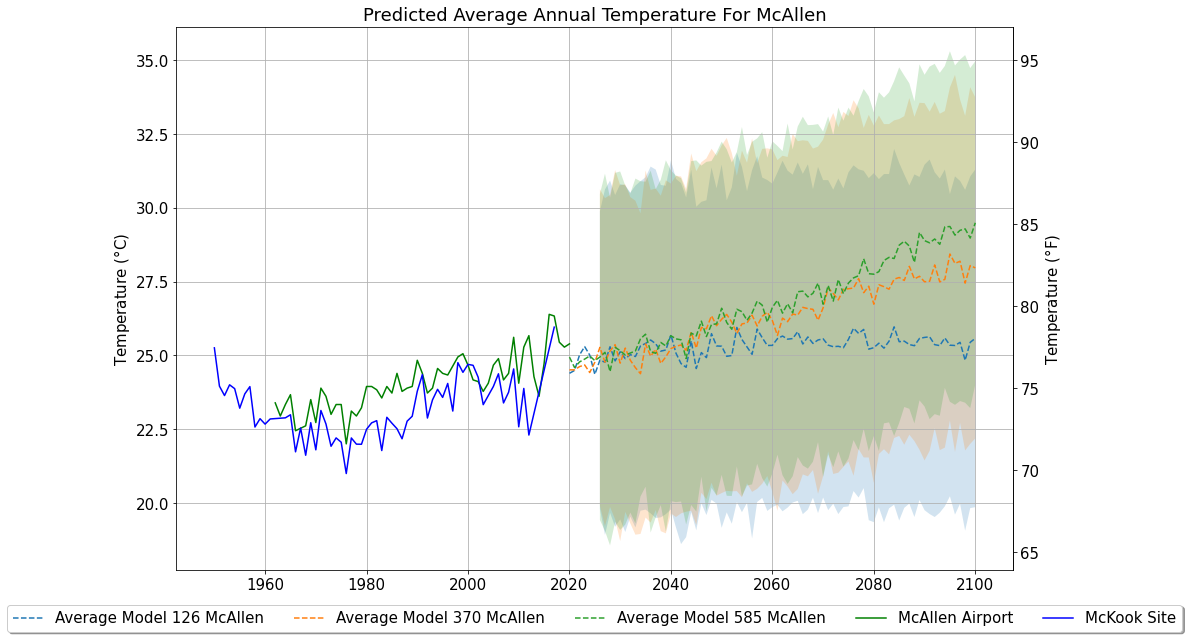

In [362]:
# figure(figsize=(15, 10), dpi=160)
fig, ax = plt.subplots(figsize=(15, 10))

#plt.plot(GFDL_MCALLN_YEAR_AR_hist[5:], MCALLN_F_AR_hist[5:],linestyle='dashed', label= "Average Model Hist McAllen")

plt.plot(GFDL_MCALLN_YEAR_AR_126[5:], MCALLN_C_AR_126[5:],linestyle='dashed', label= "Average Model 126 McAllen")
ax.fill_between(GFDL_MCALLN_YEAR_AR_126[11:], MCALLN_C_AR_126[11:]- STDEV_AR_126, MCALLN_C_AR_126[11:]+ STDEV_AR_126, alpha=0.2)

plt.plot(GFDL_MCALLN_YEAR_AR_370[5:], MCALLN_C_AR_370[5:],linestyle='dashed', label= "Average Model 370 McAllen")
ax.fill_between(GFDL_MCALLN_YEAR_AR_370[11:], MCALLN_C_AR_370[11:]- STDEV_AR_370, MCALLN_C_AR_370[11:]+ STDEV_AR_370, alpha=0.2)

plt.plot(GFDL_MCALLN_YEAR_AR_585[5:], MCALLN_C_AR_585[5:],linestyle='dashed', label= "Average Model 585 McAllen")
ax.fill_between(GFDL_MCALLN_YEAR_AR_585[11:], MCALLN_C_AR_585[11:]- STDEV_AR_585, MCALLN_C_AR_585[11:]+ STDEV_AR_585, alpha=0.2)

plt.plot(mcalln1950["DATE"],airport_C, label = "McAllen Airport", color='g')
plt.plot(mckook["YEAR"], mckook_C, label = "McKook Site", color='b')
#T_f = lambda T_c: T_c*1.8 + 32.
## Convert Fahrenheit to Celsius
#T_c = lambda T_f: (T_f - 32.)/1.8

T_f = lambda T_c: T_c*1.8 + 32.
# Convert Fahrenheit to Celsius
T_c = lambda T_f: T_f *1.8 + 32


ax.secondary_yaxis("right", functions =(T_c, T_f), ylabel = "Temperature ($\degree$F)")
plt.title("Predicted Average Annual Temperature For McAllen")
plt.ylabel("Temperature ($\degree$C)")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)


NameError: name 'GFDL_MCALLN_YEAR_AR_pi' is not defined

<Figure size 2400x1600 with 0 Axes>

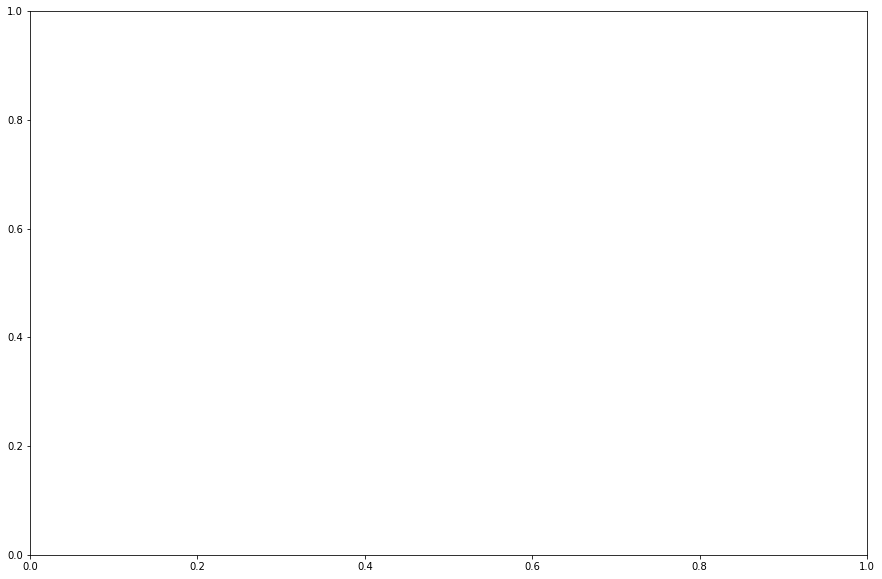

In [344]:
figure(figsize=(15, 10), dpi=160)
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(GFDL_MCALLN_YEAR_AR_pi[5:], GFDL_MCALLN_F_AR_pi[5:],linestyle='dashed', label= "GFDL pi McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR_pi[5:], IPSL_MCALLN_F_AR_pi[5:],linestyle='dashed', label= "IPSL pi McAllen")
plt.plot(MRI_MCALLN_YEAR_AR_pi[5:], MRI_MCALLN_F_AR_pi[5:],linestyle='dashed', label= "MRI pi McAllen")
plt.plot(UKE_MCALLN_YEAR_AR_pi[5:], UKE_MCALLN_F_AR_pi[5:],linestyle='dashed', label= "UKE pi McAllen")

plt.plot(GFDL_MCALLN_YEAR_AR_126[5:], GFDL_MCALLN_F_AR_126[5:],linestyle='dashed', label= "GFDL 126 McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR_126[5:], IPSL_MCALLN_F_AR_126[5:],linestyle='dashed', label= "IPSL 126 McAllen")
plt.plot(MRI_MCALLN_YEAR_AR_126[5:], MRI_MCALLN_F_AR_126[5:],linestyle='dashed', label= "MRI 126 McAllen")
plt.plot(UKE_MCALLN_YEAR_AR_126[5:], UKE_MCALLN_F_AR_126[5:],linestyle='dashed', label= "UKE 126 McAllen")

plt.plot(GFDL_MCALLN_YEAR_AR_370[5:], GFDL_MCALLN_F_AR_370[5:],linestyle='dashed', label= "GFDL 370 McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR_370[5:], IPSL_MCALLN_F_AR_370[5:],linestyle='dashed', label= "IPSL 370 McAllen")
plt.plot(MRI_MCALLN_YEAR_AR_370[5:], MRI_MCALLN_F_AR_370[5:],linestyle='dashed', label= "MRI 370 McAllen")
plt.plot(UKE_MCALLN_YEAR_AR_370[5:], UKE_MCALLN_F_AR_370[5:],linestyle='dashed', label= "UKE 370 McAllen")

plt.plot(GFDL_MCALLN_YEAR_AR_585[5:], GFDL_MCALLN_F_AR_585[5:],linestyle='dashed', label= "GFDL 585 McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR_585[5:], IPSL_MCALLN_F_AR_585[5:],linestyle='dashed', label= "IPSL 585 McAllen")
plt.plot(MRI_MCALLN_YEAR_AR_585[5:], MRI_MCALLN_F_AR_585[5:],linestyle='dashed', label= "MRI 585 McAllen")
plt.plot(UKE_MCALLN_YEAR_AR_585[5:], UKE_MCALLN_F_AR_585[5:],linestyle='dashed', label= "UKE 585 McAllen")

plt.plot(mcalln1950["DATE"],mcalln1950["TAVG"], label = "McAllen Airport", color='g')

T_f = lambda T_c: T_c*1.8 + 32.
# Convert Fahrenheit to Celsius
T_c = lambda T_f: (T_f - 32.)/1.8
ax.secondary_yaxis("right", functions =(T_c, T_f), ylabel = "Temperature ($\degree$C)")
plt.title("Predicted Average Annual Temperature For McAllen")
plt.ylabel("Temperature ($\degree$F)")
plt.grid(True)
plt.legend()

<Figure size 2400x1600 with 0 Axes>

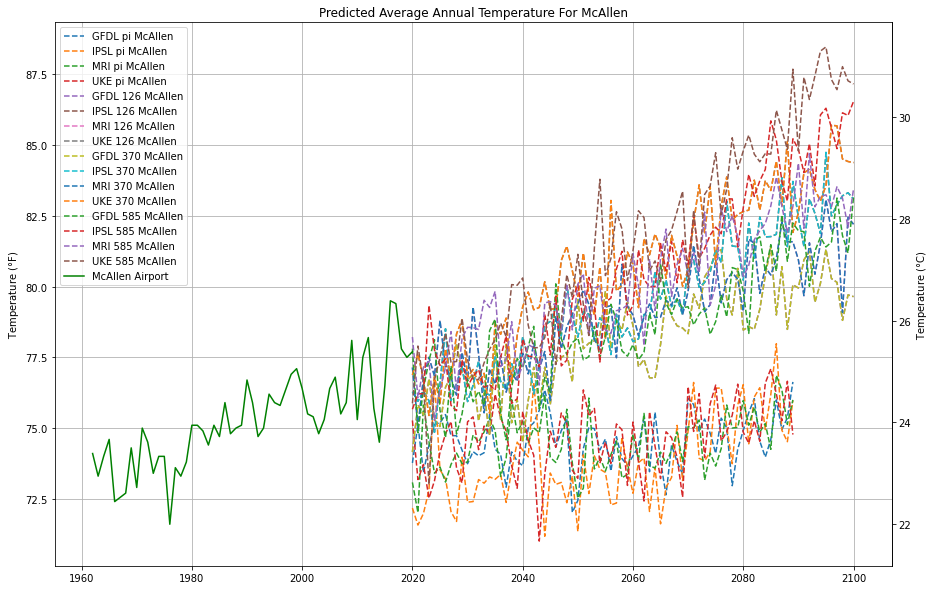

In [222]:
figure(figsize=(15, 10), dpi=160)
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(GFDL_MCALLN_YEAR_AR_pi[5:], GFDL_MCALLN_F_AR_pi[5:],linestyle='dashed', label= "GFDL pi McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR_pi[5:], IPSL_MCALLN_F_AR_pi[5:],linestyle='dashed', label= "IPSL pi McAllen")
plt.plot(MRI_MCALLN_YEAR_AR_pi[5:], MRI_MCALLN_F_AR_pi[5:],linestyle='dashed', label= "MRI pi McAllen")
plt.plot(UKE_MCALLN_YEAR_AR_pi[5:], UKE_MCALLN_F_AR_pi[5:],linestyle='dashed', label= "UKE pi McAllen")

plt.plot(GFDL_MCALLN_YEAR_AR_126[5:], GFDL_MCALLN_F_AR_126[5:],linestyle='dashed', label= "GFDL 126 McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR_126[5:], IPSL_MCALLN_F_AR_126[5:],linestyle='dashed', label= "IPSL 126 McAllen")
plt.plot(MRI_MCALLN_YEAR_AR_126[5:], MRI_MCALLN_F_AR_126[5:],linestyle='dashed', label= "MRI 126 McAllen")
plt.plot(UKE_MCALLN_YEAR_AR_126[5:], UKE_MCALLN_F_AR_126[5:],linestyle='dashed', label= "UKE 126 McAllen")

plt.plot(GFDL_MCALLN_YEAR_AR_370[5:], GFDL_MCALLN_F_AR_370[5:],linestyle='dashed', label= "GFDL 370 McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR_370[5:], IPSL_MCALLN_F_AR_370[5:],linestyle='dashed', label= "IPSL 370 McAllen")
plt.plot(MRI_MCALLN_YEAR_AR_370[5:], MRI_MCALLN_F_AR_370[5:],linestyle='dashed', label= "MRI 370 McAllen")
plt.plot(UKE_MCALLN_YEAR_AR_370[5:], UKE_MCALLN_F_AR_370[5:],linestyle='dashed', label= "UKE 370 McAllen")

plt.plot(GFDL_MCALLN_YEAR_AR_585[5:], GFDL_MCALLN_F_AR_585[5:],linestyle='dashed', label= "GFDL 585 McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR_585[5:], IPSL_MCALLN_F_AR_585[5:],linestyle='dashed', label= "IPSL 585 McAllen")
plt.plot(MRI_MCALLN_YEAR_AR_585[5:], MRI_MCALLN_F_AR_585[5:],linestyle='dashed', label= "MRI 585 McAllen")
plt.plot(UKE_MCALLN_YEAR_AR_585[5:], UKE_MCALLN_F_AR_585[5:],linestyle='dashed', label= "UKE 585 McAllen")

plt.plot(mcalln1950["DATE"],mcalln1950["TAVG"], label = "McAllen Airport", color='g')

T_f = lambda T_c: T_c*1.8 + 32.
# Convert Fahrenheit to Celsius
T_c = lambda T_f: (T_f - 32.)/1.8
ax.secondary_yaxis("right", functions =(T_c, T_f), ylabel = "Temperature ($\degree$C)")
plt.title("Predicted Average Annual Temperature For McAllen")
plt.ylabel("Temperature ($\degree$F)")
plt.grid(True)
plt.legend()

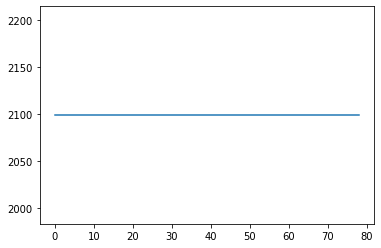

In [84]:
plt.plot(MRI_MCALLN_YEAR_AR_126[0:79], MRI_MCALLN_C_AR_126[0:79],linestyle='dashed', label= "MRI 126 McAllen")

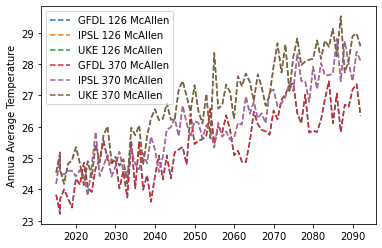

In [82]:
plt.plot(GFDL_MCALLN_YEAR_AR_126[0:79], GFDL_MCALLN_C_AR_126[0:79],linestyle='dashed', label= "GFDL 126 McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR_126[0:79], IPSL_MCALLN_C_AR_126[0:79],linestyle='dashed', label= "IPSL 126 McAllen")
#plt.plot(MRI_MCALLN_YEAR_AR_126[0:79], MRI_MCALLN_C_AR_126[0:79],linestyle='dashed', label= "MRI 126 McAllen")
plt.plot(UKE_MCALLN_YEAR_AR_126[0:79], UKE_MCALLN_C_AR_126[0:79],linestyle='dashed', label= "UKE 126 McAllen")

plt.plot(GFDL_MCALLN_YEAR_AR_370[0:79], GFDL_MCALLN_C_AR_370[0:79],linestyle='dashed', label= "GFDL 370 McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR_370[0:79], IPSL_MCALLN_C_AR_370[0:79],linestyle='dashed', label= "IPSL 370 McAllen")
plt.plot(MRI_MCALLN_YEAR_AR_370[0:79], MRI_MCALLN_C_AR_370[0:79],linestyle='dashed', label= "MRI 370 McAllen")
plt.plot(UKE_MCALLN_YEAR_AR_370[0:79], UKE_MCALLN_C_AR_370[0:79],linestyle='dashed', label= "UKE 370 McAllen")


plt.ylabel("Annua Average Temperature")
plt.legend()

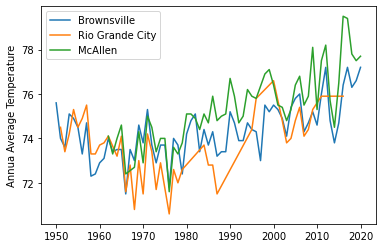

In [78]:

plt.plot(bville1950["DATE"],bville1950["TAVG"], label = "Brownsville")
plt.plot(rgcity1950["DATE"], rgcity1950["TAVG"], label = "Rio Grande City")
plt.plot(mcalln1950["DATE"],mcalln1950["TAVG"], label = "McAllen")
plt.ylabel("Annua Average Temperature")
plt.legend()

<Figure size 7500x3000 with 0 Axes>

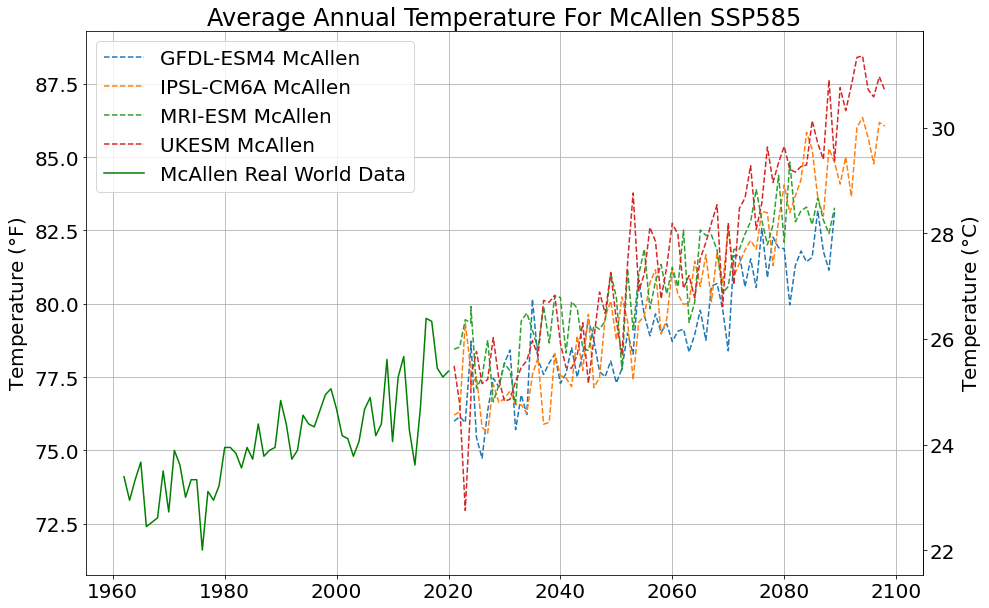

In [197]:
figure(figsize=(25, 10), dpi=300)
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15, 10))
#plt.plot(BVILLE_YEAR_AR[0:79], BVILLE_F_AR[0:79],linestyle='dashed', label= "Brownsville")
#plt.plot(RGCITY_YEAR_AR[0:79], RGCITY_F_AR[0:79],linestyle='dashed', label= "Rio Grande City")

plt.plot(GFDL_MCALLN_YEAR_AR[0:79], GFDL_MCALLN_F_AR[0:79],linestyle='dashed', label= "GFDL-ESM4 McAllen")
plt.plot(IPSL_MCALLN_YEAR_AR[0:79], IPSL_MCALLN_F_AR[0:79],linestyle='dashed', label= "IPSL-CM6A McAllen")
plt.plot(MRI_MCALLN_YEAR_AR[0:79], MRI_MCALLN_F_AR[0:79],linestyle='dashed', label= "MRI-ESM McAllen")
plt.plot(UKE_MCALLN_YEAR_AR[0:79], UKE_MCALLN_F_AR[0:79],linestyle='dashed', label= "UKESM McAllen")
#plt.plot(bville1950["DATE"],bville1950["TAVG"], label = "Brownsville Real World Data", color='teal')
#plt.plot(rgcity1950["DATE"], rgcity1950["TAVG"], label = "Rio Grande City Real World Data", color= 'orange')


plt.plot(mcalln1950["DATE"],mcalln1950["TAVG"], label = "McAllen Real World Data", color='g')

T_f = lambda T_c: T_c*1.8 + 32.
# Convert Fahrenheit to Celsius
T_c = lambda T_f: (T_f - 32.)/1.8
ax.secondary_yaxis("right", functions =(T_c, T_f), ylabel = "Temperature ($\degree$C)")
plt.title("Average Annual Temperature For McAllen SSP585")
plt.ylabel("Temperature ($\degree$F)")
plt.grid(True)
plt.legend()

In [205]:
UKE_BVILLE_F_AR[0:79]==UKE_MCALLN_F_AR[0:79]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

<Figure size 7500x3000 with 0 Axes>

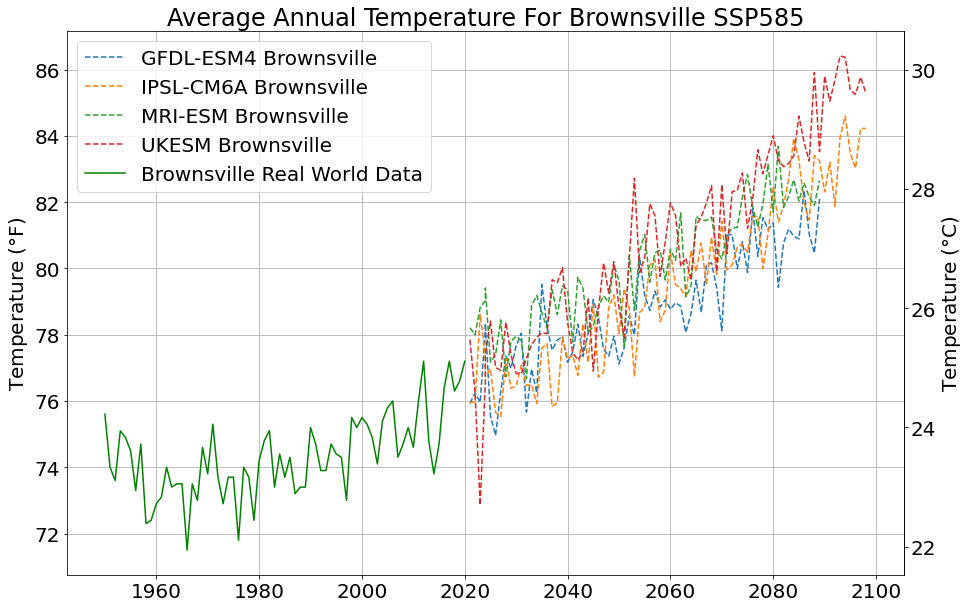

In [204]:
figure(figsize=(25, 10), dpi=300)
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15, 10))
#plt.plot(BVILLE_YEAR_AR[0:79], BVILLE_F_AR[0:79],linestyle='dashed', label= "Brownsville")
#plt.plot(RGCITY_YEAR_AR[0:79], RGCITY_F_AR[0:79],linestyle='dashed', label= "Rio Grande City")

plt.plot(GFDL_BVILLE_YEAR_AR[0:79], GFDL_BVILLE_F_AR[0:79],linestyle='dashed', label= "GFDL-ESM4 Brownsville")
plt.plot(IPSL_BVILLE_YEAR_AR[0:79], IPSL_BVILLE_F_AR[0:79],linestyle='dashed', label= "IPSL-CM6A Brownsville")
plt.plot(MRI_BVILLE_YEAR_AR[0:79], MRI_BVILLE_F_AR[0:79],linestyle='dashed', label= "MRI-ESM Brownsville")
plt.plot(UKE_BVILLE_YEAR_AR[0:79], UKE_BVILLE_F_AR[0:79],linestyle='dashed', label= "UKESM Brownsville")
#plt.plot(bville1950["DATE"],bville1950["TAVG"], label = "Brownsville Real World Data", color='teal')
#plt.plot(rgcity1950["DATE"], rgcity1950["TAVG"], label = "Rio Grande City Real World Data", color= 'orange')


plt.plot(bville1950["DATE"],bville1950["TAVG"], label = "Brownsville Real World Data", color='g')

T_f = lambda T_c: T_c*1.8 + 32.
# Convert Fahrenheit to Celsius
T_c = lambda T_f: (T_f - 32.)/1.8
ax.secondary_yaxis("right", functions =(T_c, T_f), ylabel = "Temperature ($\degree$C)")
plt.title("Average Annual Temperature For Brownsville SSP585")
plt.ylabel("Temperature ($\degree$F)")
plt.grid(True)
plt.legend()

<Figure size 7500x3000 with 0 Axes>

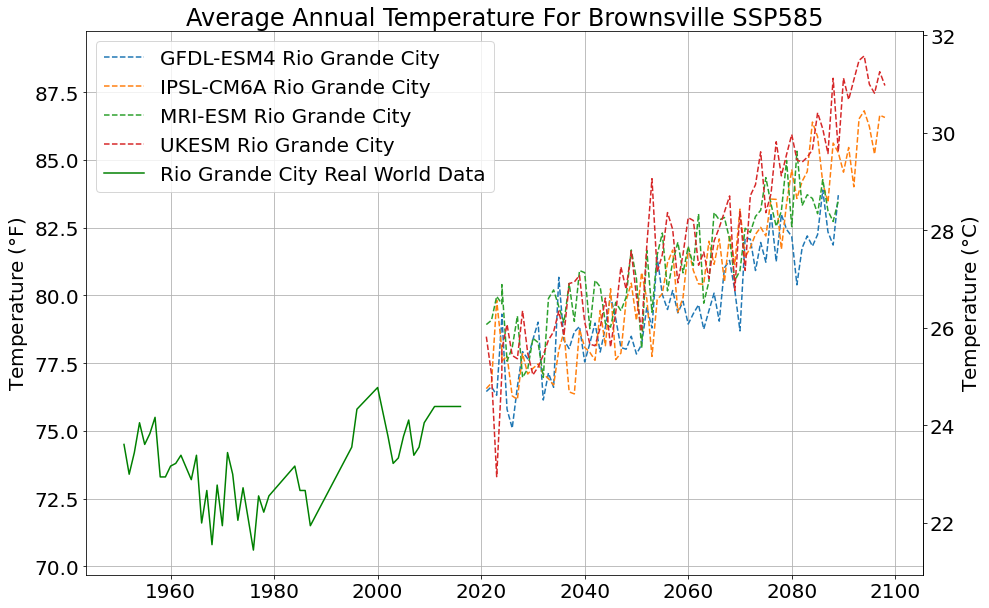

In [209]:
figure(figsize=(25, 10), dpi=300)
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15, 10))
#plt.plot(BVILLE_YEAR_AR[0:79], BVILLE_F_AR[0:79],linestyle='dashed', label= "Brownsville")
#plt.plot(RGCITY_YEAR_AR[0:79], RGCITY_F_AR[0:79],linestyle='dashed', label= "Rio Grande City")

plt.plot(GFDL_RGCITY_YEAR_AR[0:79], GFDL_RGCITY_F_AR[0:79],linestyle='dashed', label= "GFDL-ESM4 Rio Grande City")
plt.plot(IPSL_RGCITY_YEAR_AR[0:79], IPSL_RGCITY_F_AR[0:79],linestyle='dashed', label= "IPSL-CM6A Rio Grande City")
plt.plot(MRI_RGCITY_YEAR_AR[0:79], MRI_RGCITY_F_AR[0:79],linestyle='dashed', label= "MRI-ESM Rio Grande City")
plt.plot(UKE_RGCITY_YEAR_AR[0:79], UKE_RGCITY_F_AR[0:79],linestyle='dashed', label= "UKESM Rio Grande City")
#plt.plot(bville1950["DATE"],bville1950["TAVG"], label = "Brownsville Real World Data", color='teal')
#plt.plot(rgcity1950["DATE"], rgcity1950["TAVG"], label = "Rio Grande City Real World Data", color= 'orange')


plt.plot(rgcity1950["DATE"],rgcity1950["TAVG"], label = "Rio Grande City Real World Data", color='g')

T_f = lambda T_c: T_c*1.8 + 32.
# Convert Fahrenheit to Celsius
T_c = lambda T_f: (T_f - 32.)/1.8
ax.secondary_yaxis("right", functions =(T_c, T_f), ylabel = "Temperature ($\degree$C)")
plt.title("Average Annual Temperature For Brownsville SSP585")
plt.ylabel("Temperature ($\degree$F)")
plt.grid(True)
plt.legend()

NameError: name 'BVILLE_YEAR_AR' is not defined

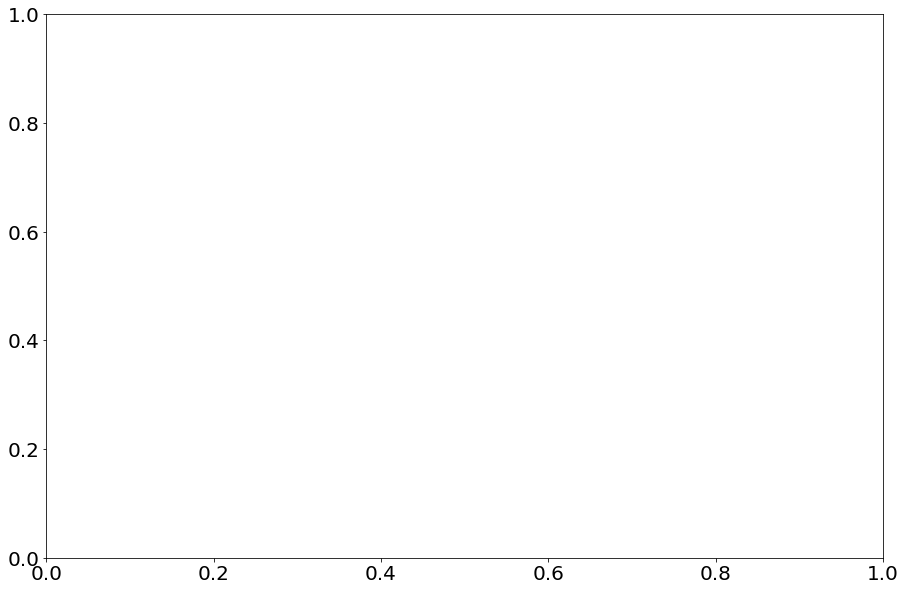

In [206]:
#figure(figsize=(15, 10), dpi=160)
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(BVILLE_YEAR_AR[0:79], BVILLE_F_AR[0:79],linestyle='dashed', label= "Brownsville")
plt.plot(RGCITY_YEAR_AR[0:79], RGCITY_F_AR[0:79],linestyle='dashed', label= "Rio Grande City")
plt.plot(MCALLN_YEAR_AR[0:79], MCALLN_F_AR[0:79],linestyle='dashed', label= "McAllen")
plt.plot(bville1950["DATE"],bville1950["TAVG"], label = "Brownsville Real World Data", color='teal')
plt.plot(rgcity1950["DATE"], rgcity1950["TAVG"], label = "Rio Grande City Real World Data", color= 'orange')
plt.plot(mcalln1950["DATE"],mcalln1950["TAVG"], label = "McAllen Real World Data", color='g')

T_f = lambda T_c: T_c*1.8 + 32.
# Convert Fahrenheit to Celsius
T_c = lambda T_f: (T_f - 32.)/1.8
ax.secondary_yaxis("right", functions =(T_c, T_f), ylabel = "Temperature ($\degree$C)")
plt.title("Average Annual Temperature")
plt.ylabel("Temperature ($\degree$F)")
plt.grid(True)
plt.legend()

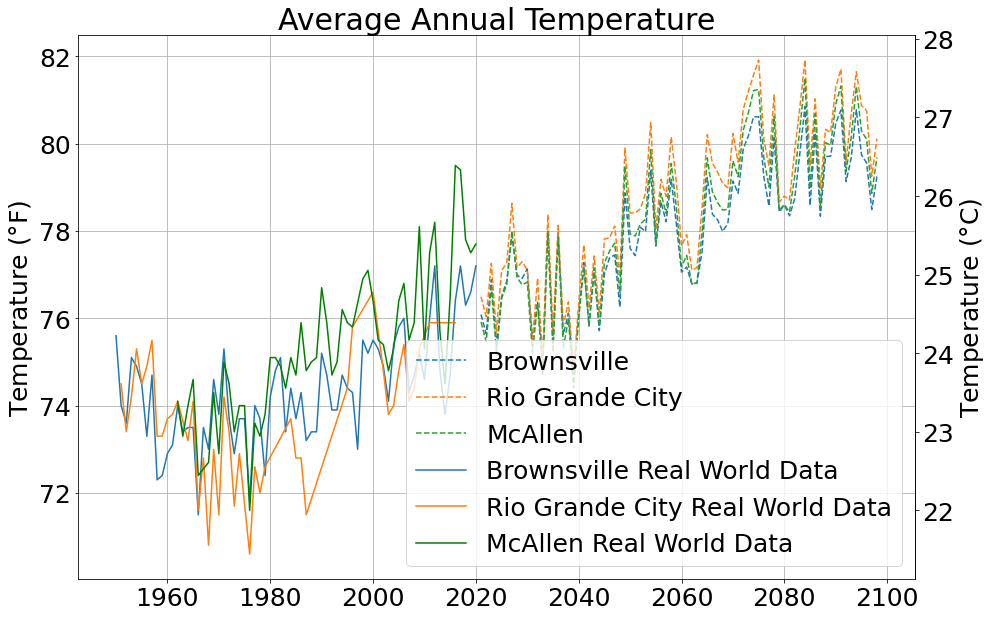

In [50]:
#figure(figsize=(15, 10), dpi=160)
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(BVILLE_YEAR_AR[0:79], BVILLE_F_AR[0:79],linestyle='dashed', label= "Brownsville")
plt.plot(RGCITY_YEAR_AR[0:79], RGCITY_F_AR[0:79],linestyle='dashed', label= "Rio Grande City")
plt.plot(MCALLN_YEAR_AR[0:79], MCALLN_F_AR[0:79],linestyle='dashed', label= "McAllen")
plt.plot(bville1950["DATE"],bville1950["TAVG"], label = "Brownsville Real World Data", color='tab:blue')
plt.plot(rgcity1950["DATE"], rgcity1950["TAVG"], label = "Rio Grande City Real World Data", color= 'tab:orange')
plt.plot(mcalln1950["DATE"],mcalln1950["TAVG"], label = "McAllen Real World Data", color='g')

T_f = lambda T_c: T_c*1.8 + 32.
# Convert Fahrenheit to Celsius
T_c = lambda T_f: (T_f - 32.)/1.8
ax.secondary_yaxis("right", functions =(T_c, T_f), ylabel = "Temperature ($\degree$C)")
plt.title("Average Annual Temperature")
plt.ylabel("Temperature ($\degree$F)")
plt.grid(True)
plt.legend()

In [39]:
#divide into pre and post 
mcalln_pre = mcallnm[(mcallnm["YEAR"]>=1950)]
bville_pre = bvillem[(bvillem["YEAR"]>=1950)]
rgcity_pre = rgcitym[(rgcitym["YEAR"]>=1950)]

In [40]:
dfBV['TAVG']=((dfBV['tasAdjust']-273)*(9/5))+32
dfMC['TAVG']=((dfMC['tasAdjust']-273)*(9/5))+32
dfRGC['TAVG']=((dfRGC['tasAdjust']-273)*(9/5))+32

In [41]:
dfRGC['TAVG']

0        50.542065
1        56.928198
2        60.225360
3        60.320282
4        55.471246
           ...    
29214    45.558832
29215    40.553076
29216    42.835486
29217    43.560089
29218    46.238776
Name: TAVG, Length: 29219, dtype: float64

In [42]:
BVILLE_TEMP_DF= pd.DataFrame(BVILLE_F_AR, columns=['TAVG'])
MCALLN_TEMP_DF= pd.DataFrame(MCALLN_F_AR, columns=['TAVG'])
RGCITY_TEMP_DF= pd.DataFrame(RGCITY_F_AR, columns=['TAVG'])

In [43]:
bville_post = dfBV[dfBV["YEAR"]>2020]
mcalln_post = dfMC[dfMC["YEAR"]>2020]
rgcity_post = dfRGC[dfRGC["YEAR"]>2020]

In [44]:
#NO LONGER 10 YEAR PERIOD, NOW ITS MUCH LONGER

#stack brownsville pre and post together 
bville_pre["PERIOD"]= "1950-2020"
bville_post["PERIOD"]= "2020-2100"
#stack dataframes 
bville_10yrpd = pd.concat([bville_pre,bville_post])

#stack brownsville pre and post together 
mcalln_pre["PERIOD"]= "1950-2020"
mcalln_post["PERIOD"]= "2020-2100"
#stack dataframes 
mcalln_10yrpd = pd.concat([bville_pre,bville_post])

#stack brownsville pre and post together 
rgcity_pre["PERIOD"]= "1950-2020"
rgcity_post["PERIOD"]= "2020-2100"
#stack dataframes 
rgcity_10yrpd = pd.concat([bville_pre,bville_post])

<ipython-input-44-933db6d3934b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bville_pre["PERIOD"]= "1950-2020"
<ipython-input-44-933db6d3934b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rgcity_pre["PERIOD"]= "1950-2020"


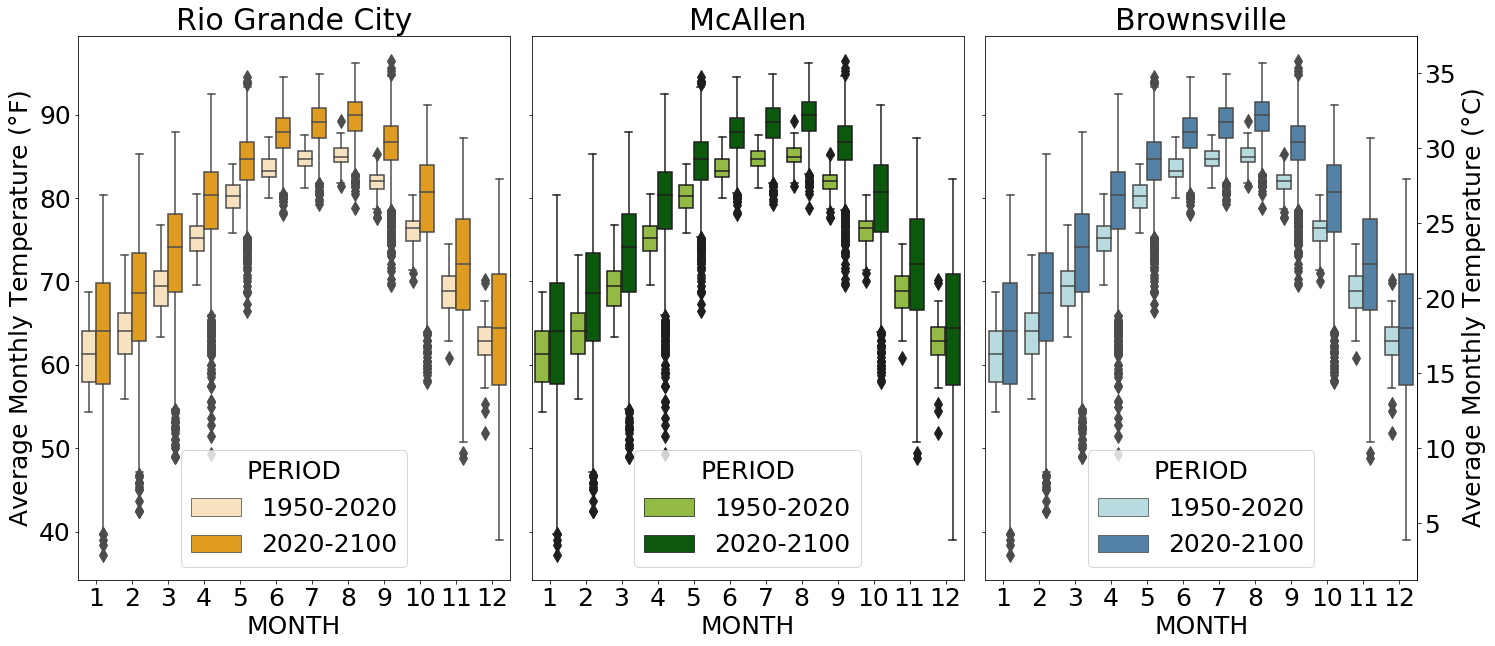

In [52]:
fig, ax = plt.subplots(1,3, sharey = True, figsize = (24,10))
plt.subplots_adjust(wspace=0.05, hspace=0)


T_f= lambda T_c: T_c*1.8+32
T_c= lambda T_f: (T_f-32)/1.8
s1 = sns.boxplot(x = "MONTH", y = "TAVG", data = rgcity_10yrpd,hue = "PERIOD", palette = ["moccasin","orange"],ax = ax[0], fliersize = 10)
s1.set(ylabel = "Average Monthly Temperature ($\degree$F)")
s1.set(title = "Rio Grande City")
s2 = sns.boxplot(x = "MONTH", y = "TAVG", data = mcalln_10yrpd,hue = "PERIOD", palette = ["yellowgreen","darkgreen"], ax = ax[1], fliersize = 10)
s2.set(ylabel = None)
s2.set(title = "McAllen")
s3 = sns.boxplot(x = "MONTH", y = "TAVG", data = bville_10yrpd,hue = "PERIOD", palette = ["powderblue","steelblue"], ax = ax[2], fliersize = 10)
s3.set(ylabel = None)
s3.set(title = "Brownsville")
s3.secondary_yaxis('right', functions=(T_c, T_f), ylabel="Average Monthly Temperature ($\degree$C)")

In [519]:
#THIS CHANGES THE DIRECTORY AHHHHHHHHHH!!!!!!!!!
%cd "/Volumes/passport/Present/Work/OceanLabWork/Proj1/SIMIMIP/ESM4_tasMAX"


/Volumes/passport/Present/Work/OceanLabWork/Proj1/SIMIMIP/ESM4_tasMAX


In [521]:
file9= 'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmaxAdjust_global_daily_2021_2030.nc'
data9= xr.open_dataset(file9, decode_times=False)

file10= 'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmaxAdjust_global_daily_2031_2040.nc'
data10= xr.open_dataset(file10, decode_times=False)

file11= 'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmaxAdjust_global_daily_2041_2050.nc'
data11= xr.open_dataset(file11, decode_times=False)

file12= 'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmaxAdjust_global_daily_2051_2060.nc'
data12= xr.open_dataset(file12, decode_times=False)

file13= 'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmaxAdjust_global_daily_2061_2070.nc'
data13= xr.open_dataset(file13, decode_times=False)

file14= 'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmaxAdjust_global_daily_2071_2080.nc'
data14= xr.open_dataset(file14, decode_times=False)

file15= 'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmaxAdjust_global_daily_2081_2090.nc'
data715= xr.open_dataset(file15, decode_times=False)

file16= 'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmaxAdjust_global_daily_2091_2100.nc'
data16= xr.open_dataset(file16, decode_times=False)

In [524]:
%cd "/Volumes/passport/Present/Work/OceanLabWork/Proj1/SIMIMIP/ESM4_tasMIN"

/Volumes/passport/Present/Work/OceanLabWork/Proj1/SIMIMIP/ESM4_tasMIN


In [532]:
file17= 'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasminAdjust_global_daily_2021_2030.nc'
data17= xr.open_dataset(file17, decode_times=False)

In [526]:
file18= r'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasminAdjust_global_daily_2031_2040.nc'
data18= xr.open_dataset(file18, decode_times=False)

In [533]:
file19= 'gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasminAdjust_global_daily_2041_2050.nc'
data19= xr.open_dataset(file19, decode_times=False)

OSError: [Errno -51] NetCDF: Unknown file format: b'/Volumes/passport/Present/Work/OceanLabWork/Proj1/SIMIMIP/ESM4_tasMIN/gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasminAdjust_global_daily_2041_2050.nc'